# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tabulate import tabulate
from sklearn.model_selection import cross_val_score

# LOADING THE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CS/dataset_sdn.csv')

In [ ]:
data.shape

(104345, 23)

In [ ]:
data.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
data.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,3,15099,14693,1,1.0,2.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [ ]:
data.label.unique()

array([0, 1])

In [ ]:
data.label.value_counts()

0    63561
1    40784
Name: label, dtype: int64

In [ ]:
data.label

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

<Axes: title={'center': 'Label Count'}, xlabel='label', ylabel='count'>

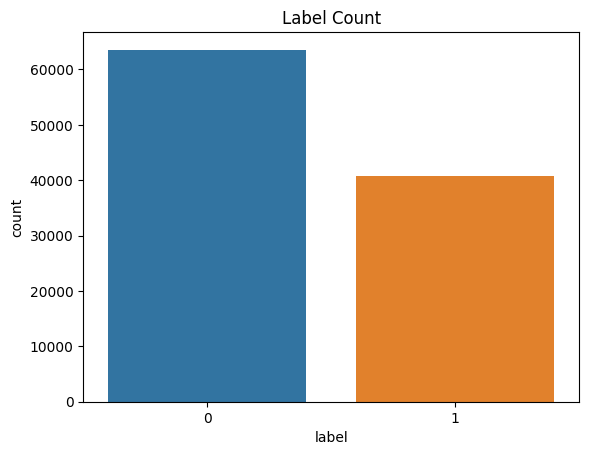

In [ ]:
label_dict = dict(data.label.value_counts())
plt.title('Label Count')
sns.countplot(x = data.label)

In [ ]:
data.corr()

<ipython-input-13-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
dt,1.000000,-0.006160,-0.175234,-0.291375,0.273140,-0.165584,0.272953,0.330843,0.042411,-0.235173,-0.310792,-0.235291,0.715172,-0.018501,0.080814,0.092080,-0.032566,-0.041620,-0.054373,-0.110126
switch,-0.006160,1.000000,-0.057291,-0.167475,-0.023298,-0.076833,-0.023424,-0.028348,0.199854,-0.036148,-0.112619,-0.036156,0.090251,-0.006665,-0.050381,-0.057712,-0.032836,-0.039025,-0.050972,0.028027
pktcount,-0.175234,-0.057291,1.000000,0.676926,0.024017,0.034668,0.024079,-0.257940,0.275956,0.469584,0.290847,0.469615,-0.086421,0.004171,0.024890,0.028576,0.001352,0.002328,0.003054,0.401894
bytecount,-0.291375,-0.167475,0.676926,1.000000,0.038026,0.029862,0.038028,-0.246348,-0.123280,0.333901,0.533224,0.333924,-0.390266,-0.012527,0.004951,0.005869,0.048198,0.058850,0.076920,0.277481
dur,0.273140,-0.023298,0.024017,0.038026,1.000000,-0.055804,0.999998,0.177488,-0.124786,-0.329818,-0.260732,-0.330080,0.182416,0.000706,0.155276,0.177284,-0.140111,-0.166916,-0.218143,-0.098479
dur_nsec,-0.165584,-0.076833,0.034668,0.029862,-0.055804,1.000000,-0.054438,-0.010362,-0.058871,0.043195,0.047172,0.043197,-0.210022,0.020679,0.007711,0.008859,-0.035466,-0.042023,-0.054903,0.029064
tot_dur,0.272953,-0.023424,0.024079,0.038028,0.999998,-0.054438,1.000000,0.177489,-0.124864,-0.329797,-0.260720,-0.330059,0.182166,0.000745,0.155317,0.177332,-0.140192,-0.167011,-0.218268,-0.098491
flows,0.330843,-0.028348,-0.257940,-0.246348,0.177488,-0.010362,0.177489,1.000000,0.046633,-0.213769,-0.248114,-0.213898,0.393530,0.034105,0.167647,0.191567,0.156891,0.183821,0.240285,-0.182174
packetins,0.042411,0.199854,0.275956,-0.123280,-0.124786,-0.058871,-0.124864,0.046633,1.000000,0.185628,-0.105359,0.185690,0.267852,-0.000179,0.107550,0.123259,0.037548,0.044762,0.058529,-0.002642
pktperflow,-0.235173,-0.036148,0.469584,0.333901,-0.329818,0.043195,-0.329797,-0.213769,0.185628,1.000000,0.813386,0.999999,-0.173475,0.002151,-0.054403,-0.062198,0.104102,0.124257,0.162416,0.087819


In [ ]:
data.isna().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

Text(0.5, 1.0, 'Features which has NuLL values')

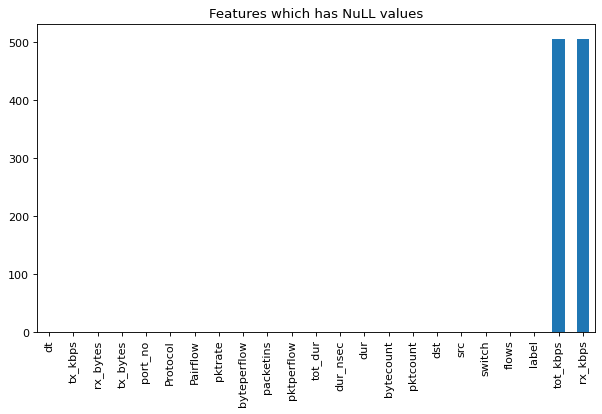

In [ ]:
#Vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [ ]:
data.dropna(inplace=True)
data.isna().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [ ]:
data.shape

(103839, 23)

In [ ]:
data.dtypes

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

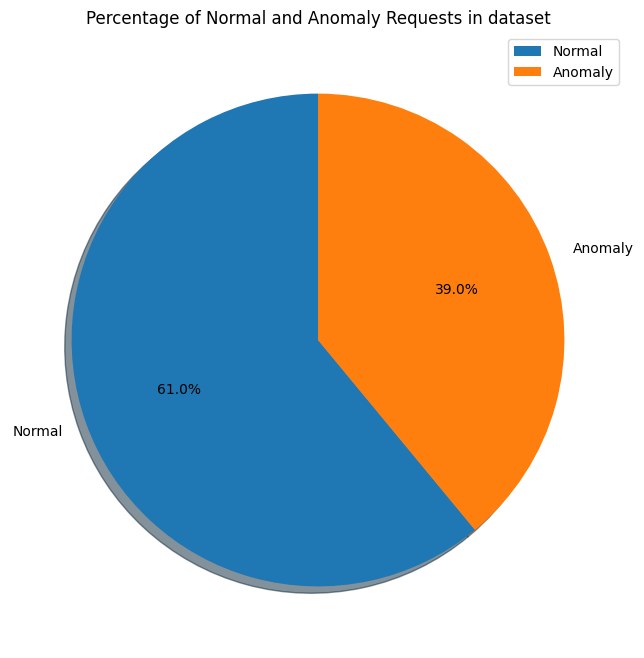

In [ ]:
labels = ["Normal", "Anomaly"]
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Normal", "Anomaly"])
plt.title('Percentage of Normal and Anomaly Requests in dataset')
plt.show()

In [ ]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [ ]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


Text(0.5, 1.0, 'Number of all reqests')

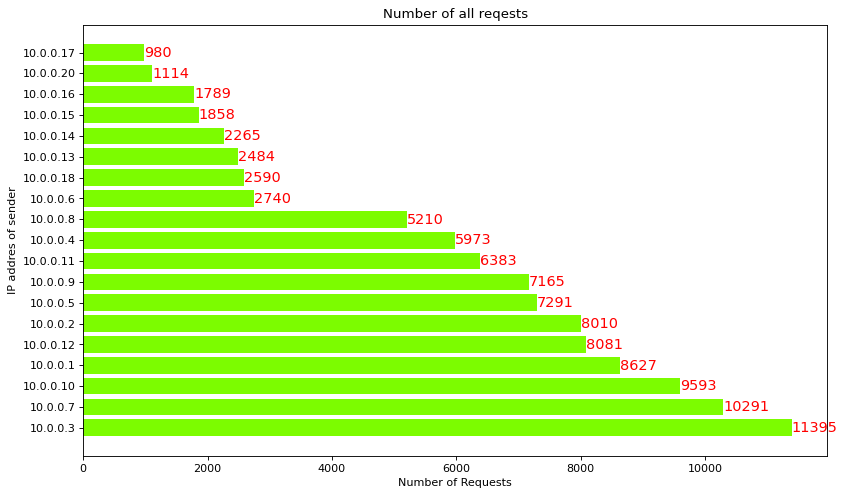

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

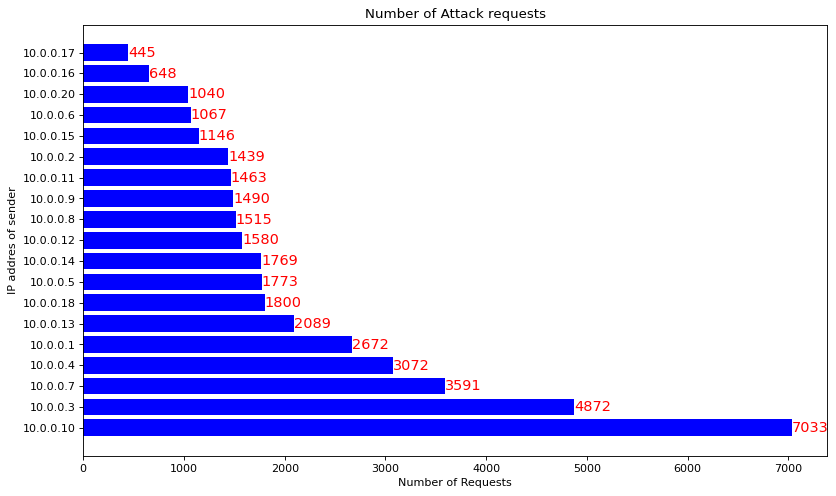

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

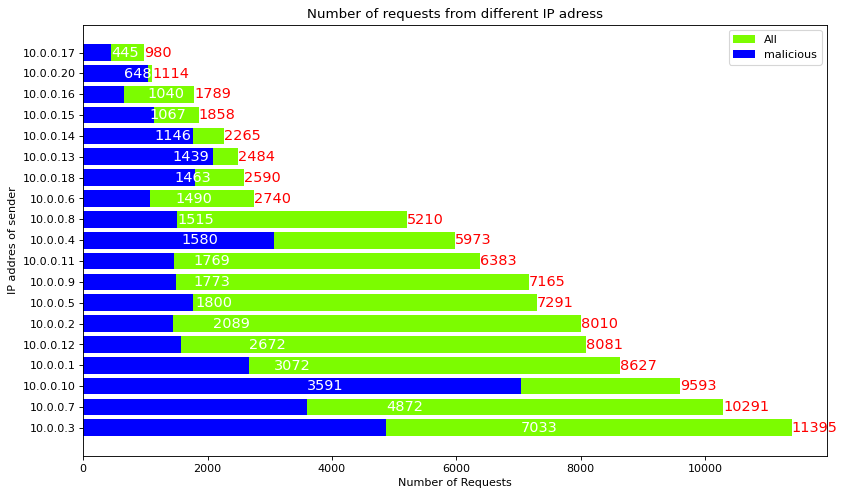

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP address')


Text(0.5, 1.0, 'The number of requests from different protocols')

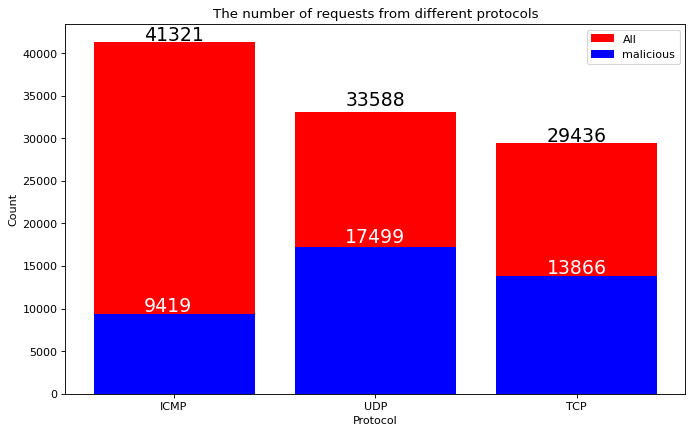

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [ ]:
df = data.copy()

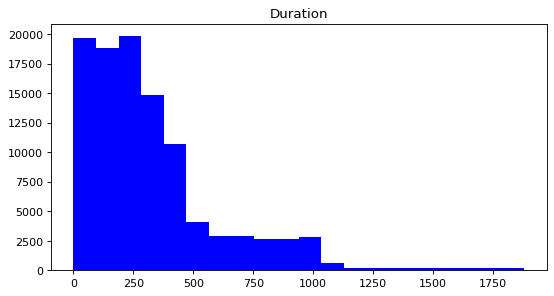

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

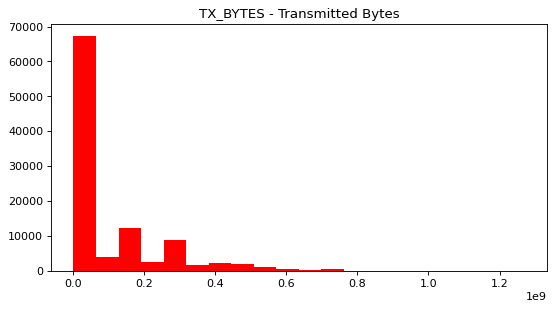

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

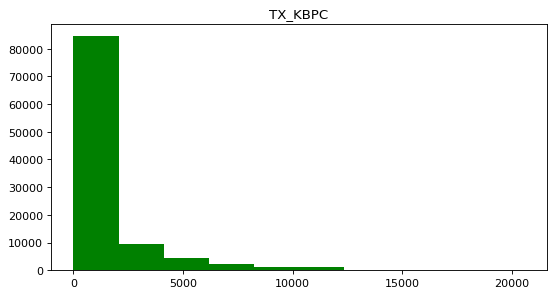

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

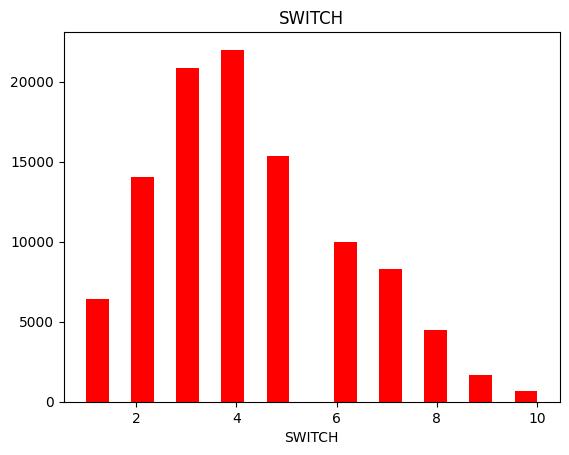

In [ ]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

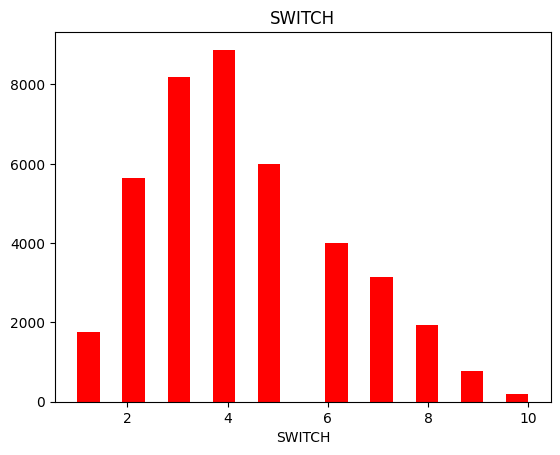

In [ ]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

In [ ]:
data = data.drop(['src','dst'],axis=1)

In [ ]:
data = data.drop(['Protocol'],axis=1)

In [ ]:
x = data.drop(columns=['label'])
y = data['label']

In [ ]:
x.shape

(103839, 19)

In [ ]:
y.shape

(103839,)

In [ ]:
y.value_counts() 

0    63335
1    40504
Name: label, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
precisionscore = []
recallscore = []
f1score = []
accuracyscore = []

# SPLITING THE TRAIN AND TEST DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72687, 19), (31152, 19), (72687,), (31152,))

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(x_test)

In [ ]:
#y_pred_lr.shape

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_pred_lr, y_test)

array([[15969,  4613],
       [ 3221,  7349]])

In [ ]:
cross_val_score(lr, x, y).mean()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.547568202611661

In [ ]:
accuracy_score(y_test, y_pred_lr)

0.7485233692860811


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     19190
           1       0.70      0.61      0.65     11962

    accuracy                           0.75     31152
   macro avg       0.74      0.72      0.73     31152
weighted avg       0.74      0.75      0.75     31152


CONFUSION MATRIX


<Axes: >

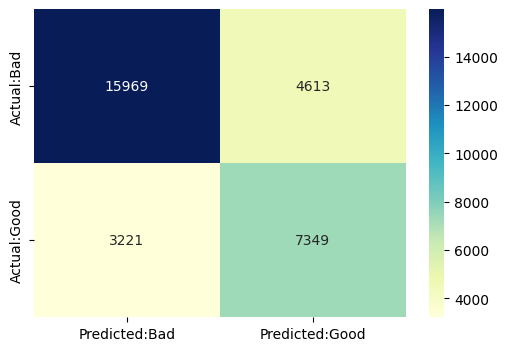

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(lr.predict(x_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test,y_pred_lr))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
# lr = LogisticRegression(solver='liblinear',multi_class='ovr')
# lr.fit(x_train, y_train) 
# y_pred_lr = lr.predict(x_test)

In [ ]:
lr_train, lr_test = lr.score(x_train , y_train), lr.score(x_test , y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print('Accuracy_lr:', accuracy_score(y_test, y_pred_lr))
print('Precision_lr:', precision_score(y_test, y_pred_lr))
print('Recall_lr:   ', recall_score(y_test, y_pred_lr))
print('F1 Score_lr: ', f1_score(y_test, y_pred_lr))

Accuracy_lr: 0.7485233692860811
Precision_lr: 0.6952696310312204
Recall_lr:    0.6143621467981942
F1 Score_lr:  0.6523167051304811


In [ ]:
alr = round(accuracy_score(y_test, y_pred_lr)*100, 2)
plr = round(precision_score(y_test, y_pred_lr)*100, 2)
rlr = round(recall_score(y_test, y_pred_lr)*100, 2)
f1lr = round(f1_score(y_test, y_pred_lr)*100, 2)


accuracyscore.append(alr)
precisionscore.append(plr)
recallscore.append(rlr)
f1score.append(f1lr)

In [ ]:
print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))

Train score is: 0.7435167223850208
Test score is: 0.7485233692860811


# RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
RF_pred = rf.predict(x_test)

#Scores
print(accuracy_score(y_test,RF_pred))


1.0


In [ ]:
cross_val_score(rf, x, y).mean()

0.9081661928375014


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

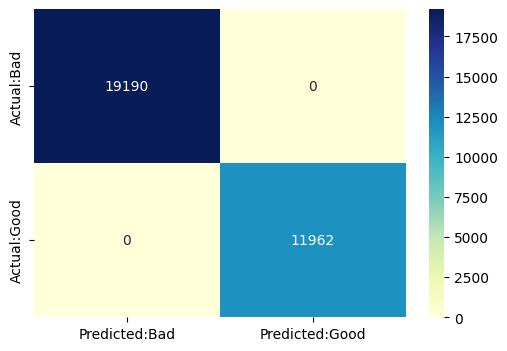

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(rf.predict(x_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test,RF_pred))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
RF_cm = confusion_matrix(RF_pred, y_test)
print(RF_cm)

[[19190     0]
 [    0 11962]]


In [ ]:
rf_train, rf_test = rf.score(x_train , y_train), rf.score(x_test , y_test)

In [ ]:
print('Accuracy_rf:', accuracy_score(y_test, RF_pred))
print('Precision_rf:', precision_score(y_test, RF_pred))
print('Recall_rf:   ', recall_score(y_test, RF_pred))
print('F1 Score_rf: ', f1_score(y_test, RF_pred))

Accuracy_rf: 1.0
Precision_rf: 1.0
Recall_rf:    1.0
F1 Score_rf:  1.0


In [ ]:
arf = round(accuracy_score(y_test, RF_pred)*100, 2)
prf = round(precision_score(y_test, RF_pred)*100, 2)
rrf = round(recall_score(y_test, RF_pred)*100, 2)
f1rf = round(f1_score(y_test, RF_pred)*100, 2)


accuracyscore.append(arf)
precisionscore.append(prf)
recallscore.append(rrf)
f1score.append(f1rf)

In [ ]:
print("Train score is:", rf.score(x_train, y_train))
print("Test score is:", rf.score(x_test, y_test))

Train score is: 1.0
Test score is: 1.0


# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_y_pred = dt.predict(x_test)

In [ ]:
print(accuracy_score(y_test,dt_y_pred))

0.9999357986646122


In [ ]:
cross_val_score(dt, x, y).mean()

0.9196550653953992


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

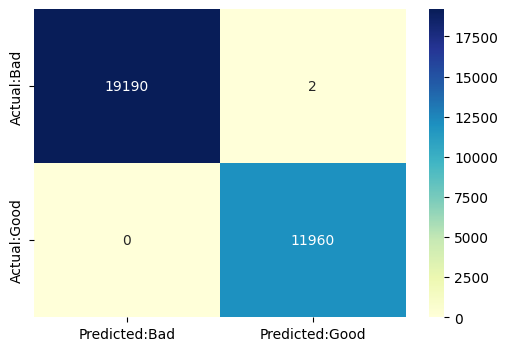

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(dt.predict(x_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test,dt_y_pred))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
dt_cm = confusion_matrix(dt_y_pred, y_test)
print(dt_cm)

[[19190     2]
 [    0 11960]]


In [ ]:
dt_train, dt_test = dt.score(x_train , y_train), dt.score(x_test , y_test)

In [ ]:
print('Accuracy_dt:', accuracy_score(y_test, dt_y_pred))
print('Precision_dt:', precision_score(y_test, dt_y_pred))
print('Recall_dt:   ', recall_score(y_test, dt_y_pred))
print('F1 Score_dt: ', f1_score(y_test, dt_y_pred))

Accuracy_dt: 0.9999357986646122
Precision_dt: 1.0
Recall_dt:    0.99983280387895
F1 Score_dt:  0.999916394950255


In [ ]:
adt = round(accuracy_score(y_test, dt_y_pred)*100, 2)
pdt = round(precision_score(y_test, dt_y_pred)*100, 2)
rdt = round(recall_score(y_test, dt_y_pred)*100, 2)
f1dt = round(f1_score(y_test, dt_y_pred)*100, 2)


accuracyscore.append(adt)
precisionscore.append(pdt)
recallscore.append(rdt)
f1score.append(f1dt)

In [ ]:
print("Train score is:", dt.score(x_train, y_train))
print("Test score is:", dt.score(x_test, y_test))

Train score is: 1.0
Test score is: 0.9999357986646122


# GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
  
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc = gbc.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_gbc))

0.9960837185413457


In [ ]:
cross_val_score(gbc, x, y).mean()

0.9518969690712487


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19190
           1       0.99      1.00      0.99     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

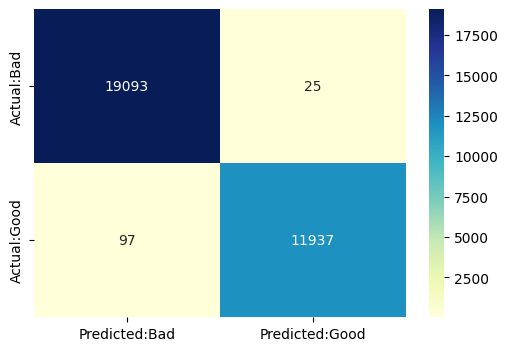

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(gbc.predict(x_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test,y_pred_gbc))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
gbc_cm = confusion_matrix(y_pred_gbc, y_test)
print(gbc_cm)

[[19093    25]
 [   97 11937]]


In [ ]:
gbc_train, gbc_test = gbc.score(x_train , y_train), gbc.score(x_test , y_test)

In [ ]:
print('Accuracy_gbc:', accuracy_score(y_test, y_pred_gbc))
print('Precision_gbc:', precision_score(y_test, y_pred_gbc))
print('Recall_gbc:   ', recall_score(y_test, y_pred_gbc))
print('F1 Score_gbc: ', f1_score(y_test, y_pred_gbc))

Accuracy_gbc: 0.9960837185413457
Precision_gbc: 0.9919395047365797
Recall_gbc:    0.9979100484868751
F1 Score_gbc:  0.9949158193032173


In [ ]:
agbc = round(accuracy_score(y_test, y_pred_gbc)*100, 2)
pgbc = round(precision_score(y_test, y_pred_gbc)*100, 2)
rgbc = round(recall_score(y_test, y_pred_gbc)*100, 2)
f1gbc = round(f1_score(y_test, y_pred_gbc)*100, 2)


accuracyscore.append(agbc)
precisionscore.append(pgbc)
recallscore.append(rgbc)
f1score.append(f1gbc)

In [ ]:
print("Train score is:", gbc.score(x_train, y_train))
print("Test score is:", gbc.score(x_test, y_test))

Train score is: 0.9964367768651891
Test score is: 0.9960837185413457


# ENSEMBLE MODELS USING VOTING CLASSIFIER 

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vch1 = VotingClassifier([('clf1', lr), ('clf2', rf)])
cross_val_score(vch1, x, y).mean()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.715655165615888

In [ ]:
vch2 = VotingClassifier([('clf1', rf), ('clf2', dt)])
cross_val_score(vch2, x, y).mean()

0.9138190448310379

In [ ]:
vch3 = VotingClassifier([('clf1', rf), ('clf2', gbc)])
cross_val_score(vch3, x, y).mean()

0.9242967686154318

In [ ]:
vch4 = VotingClassifier([('clf1', dt), ('clf2', gbc)])
cross_val_score(vch4, x, y).mean()

0.9097261976431881

In [ ]:
vch5 = VotingClassifier([('clf1', rf), ('clf2', dt), ('clf3', gbc)])
cross_val_score(vch5, x, y).mean()

0.9437498567086294

# VOTING CLASSIFIER

# Hard Voting

In [ ]:
vc_hard = VotingClassifier([('clf1', rf), ('clf2', gbc)], voting = 'hard')

In [ ]:
vc_hard.fit(x_train, y_train)
y_pred_h = vc_hard.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_h))

0.9991974833076528



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

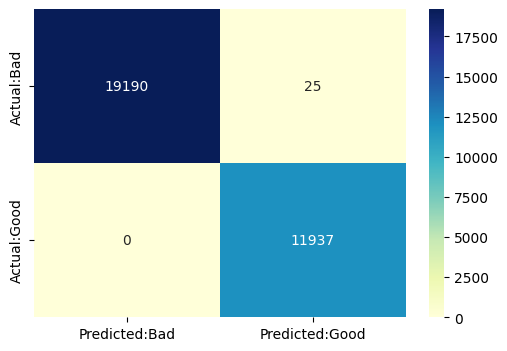

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vc_hard.predict(x_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test,y_pred_h))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
vch_cm = confusion_matrix(y_pred_h, y_test)
print(vch_cm)

[[19190    25]
 [    0 11937]]


In [ ]:
vch_train, vch_test = vc_hard.score(x_train , y_train), vc_hard.score(x_test , y_test)

In [ ]:
print('Accuracy_vch:', accuracy_score(y_test, y_pred_h))
print('Precision_vch:', precision_score(y_test, y_pred_h))
print('Recall_vch:   ', recall_score(y_test, y_pred_h))
print('F1 Score_vch: ', f1_score(y_test, y_pred_h))

Accuracy_vch: 0.9991974833076528
Precision_vch: 1.0
Recall_vch:    0.9979100484868751
F1 Score_vch:  0.9989539311268255


In [ ]:
avch = round(accuracy_score(y_test, y_pred_h)*100, 2)
pvch = round(precision_score(y_test, y_pred_h)*100, 2)
rvch = round(recall_score(y_test, y_pred_h)*100, 2)
f1vch = round(f1_score(y_test, y_pred_h)*100, 2)


accuracyscore.append(avch)
precisionscore.append(pvch)
recallscore.append(rvch)
f1score.append(f1vch)

In [ ]:
print("Train score is:", vc_hard.score(x_train, y_train))
print("Test score is:", vc_hard.score(x_test, y_test))

Train score is: 0.9991745429031326
Test score is: 0.9991974833076528


# Soft Voting

In [ ]:
vc_soft = VotingClassifier([('clf1', rf), ('clf2', gbc)], voting = 'soft')
vc_soft.fit(x_train, y_train)
y_pred_s = vc_soft.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_s))

0.9998394966615306



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

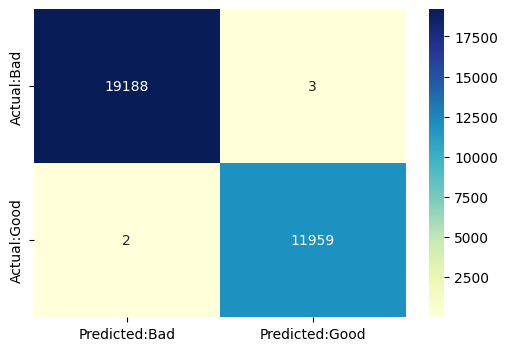

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vc_soft.predict(x_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test,y_pred_s))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
vcs_cm = confusion_matrix(y_pred_s, y_test)
print(vcs_cm)

[[19188     3]
 [    2 11959]]


In [ ]:
vcs_train, vcs_test = vc_soft.score(x_train , y_train), vc_soft.score(x_test , y_test)

In [ ]:
print('Accuracy_vcs:', accuracy_score(y_test, y_pred_s))
print('Precision_vcs:', precision_score(y_test, y_pred_s))
print('Recall_vcs:   ', recall_score(y_test, y_pred_s))
print('F1 Score_vcs: ', f1_score(y_test, y_pred_s))

Accuracy_vcs: 0.9998394966615306
Precision_vcs: 0.9998327899005099
Recall_vcs:    0.999749205818425
F1 Score_vcs:  0.9997909961125278


In [ ]:
avcs = round(accuracy_score(y_test, y_pred_s)*100, 2)
pvcs = round(precision_score(y_test, y_pred_s)*100, 2)
rvcs = round(recall_score(y_test, y_pred_s)*100, 2)
f1vcs = round(f1_score(y_test, y_pred_s)*100, 2)


accuracyscore.append(avcs)
precisionscore.append(pvcs)
recallscore.append(rvcs)
f1score.append(f1vcs)

In [ ]:
print("Train score is:", vc_soft.score(x_train, y_train))
print("Test score is:", vc_soft.score(x_test, y_test))

Train score is: 0.9999449695268755
Test score is: 0.9998394966615306


# STACKING CLASSIFIER

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
sm = StackingClassifier(
    [('clf1', rf), ('clf2', dt), ('clf3', gbc)], final_estimator = LogisticRegression()
)

In [ ]:
sm.fit(x_train, y_train)

StackingClassifier(estimators=[('clf1', RandomForestClassifier()),
                               ('clf2', DecisionTreeClassifier()),
                               ('clf3', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_sm = sm.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_sm))

1.0



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

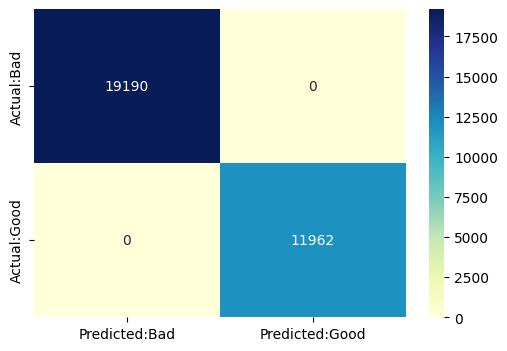

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(sm.predict(x_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test,y_pred_sm))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
sc_cm = confusion_matrix(y_pred_sm, y_test)
print(sc_cm)

[[19190     0]
 [    0 11962]]


In [ ]:
print('Accuracy_sm:', accuracy_score(y_test, y_pred_sm))
print('Precision_sm:', precision_score(y_test, y_pred_sm))
print('Recall_sm:   ', recall_score(y_test, y_pred_sm))
print('F1 Score_sm: ', f1_score(y_test, y_pred_sm))

Accuracy_sm: 1.0
Precision_sm: 1.0
Recall_sm:    1.0
F1 Score_sm:  1.0


In [ ]:
asc = round(accuracy_score(y_test, y_pred_sm)*100, 2)
psc = round(precision_score(y_test, y_pred_sm)*100, 2)
rsc = round(recall_score(y_test, y_pred_sm)*100, 2)
f1sc = round(f1_score(y_test, y_pred_sm)*100, 2)


accuracyscore.append(asc)
precisionscore.append(psc)
recallscore.append(rsc)
f1score.append(f1sc)

In [ ]:
print("Train score is:", sm.score(x_train, y_train))
print("Test score is:", sm.score(x_test, y_test))

Train score is: 1.0
Test score is: 1.0


In [ ]:
sc_train, sc_test = sm.score(x_train , y_train), sm.score(x_test , y_test)

# MODEL TABLE

In [ ]:
Models = ["Logistic Regression", "Random Forest", "Decision Tree", "Gradient Boosting Classifier", "Voting Classifier Hard", "Voting Classifier Soft", "Stacking Classifier"]

In [ ]:
data_table = [["Logistic Regression", lr_train, lr_test], 
        ["Random Forest", rf_train, rf_test],
        ["Decision Tree", dt_train, dt_test],
        ["Gradient Boosting Classifier", gbc_train, gbc_test],
        ["Voting Classifier Hard", vch_train, vch_test],
        ["Voting Classifier Soft", vcs_train, vcs_test],
        ["Stacking Classifier", sc_train, sc_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data_table, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════════╤═══════════════╤══════════════╕
│ Model                        │   Train Score │   Test Score │
╞══════════════════════════════╪═══════════════╪══════════════╡
│ Logistic Regression          │      0.743517 │     0.748523 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Random Forest                │      1        │     1        │
├──────────────────────────────┼───────────────┼──────────────┤
│ Decision Tree                │      1        │     0.999936 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Gradient Boosting Classifier │      0.996437 │     0.996084 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Voting Classifier Hard       │      0.999175 │     0.999197 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Voting Classifier Soft       │      0.999945 │     0.999839 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Stacking Classifier          │      1 

In [ ]:
result_table = [["Logistic Regression", plr, rlr, f1lr], 
        ["Random Forest", prf, rrf, f1rf],
        ["Decision Tree", pdt, rdt, f1dt],
        ["Gradient Boosting Classifier", pgbc, rgbc, f1gbc],
        ["Voting Classifier Hard", pvch, rvch, f1vch],
        ["Voting Classifier Soft", pvcs, rvcs, f1vcs],
        ["Stacking Classifier", psc, rsc, f1sc]]

col_names = ["Model", "Precision", "Recall", "F1 Score"]
print(tabulate(result_table, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════════╤═════════════╤══════════╤════════════╕
│ Model                        │   Precision │   Recall │   F1 Score │
╞══════════════════════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression          │       69.53 │    61.44 │      65.23 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Random Forest                │      100    │   100    │     100    │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree                │      100    │    99.98 │      99.99 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting Classifier │       99.19 │    99.79 │      99.49 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Voting Classifier Hard       │      100    │    99.79 │      99.9  │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Voting Classifier Soft       │       99.98 │    99.97 │      99.98 │
├─────

In [ ]:
Models

['Logistic Regression',
 'Random Forest',
 'Decision Tree',
 'Gradient Boosting Classifier',
 'Voting Classifier Hard',
 'Voting Classifier Soft',
 'Stacking Classifier']

In [ ]:
accuracyscore

[74.85, 100.0, 99.99, 99.61, 99.92, 99.98, 100.0]

In [ ]:
precisionscore

[69.53, 100.0, 100.0, 99.19, 100.0, 99.98, 100.0]

In [ ]:
recallscore

[61.44, 100.0, 99.98, 99.79, 99.79, 99.97, 100.0]

In [ ]:
f1score

[65.23, 100.0, 99.99, 99.49, 99.9, 99.98, 100.0]

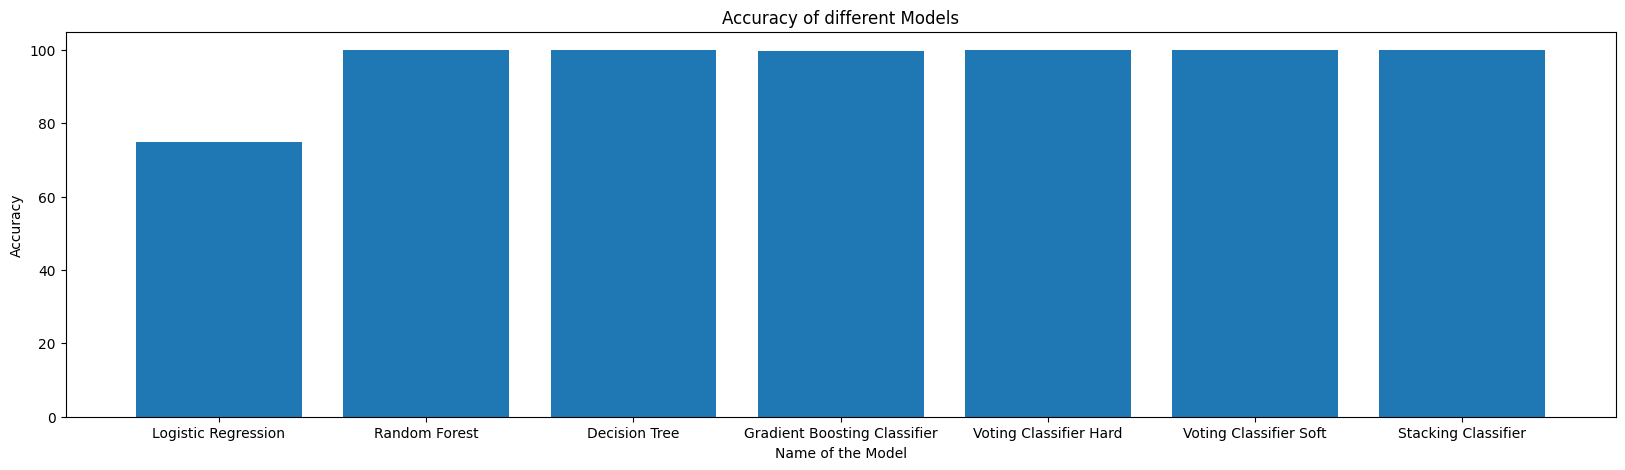

In [ ]:
plt.bar(Models, accuracyscore)
plt.xlabel('Name of the Model')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

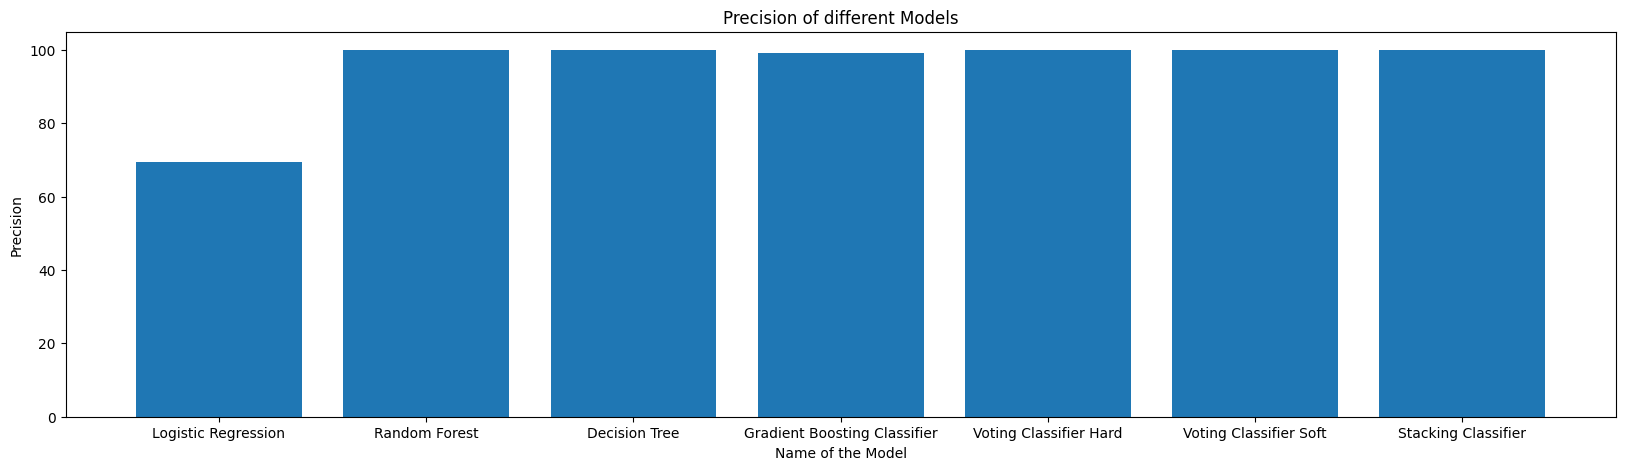

In [ ]:
plt.bar(Models, precisionscore)
plt.xlabel('Name of the Model')
plt.ylabel('Precision')
plt.title("Precision of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

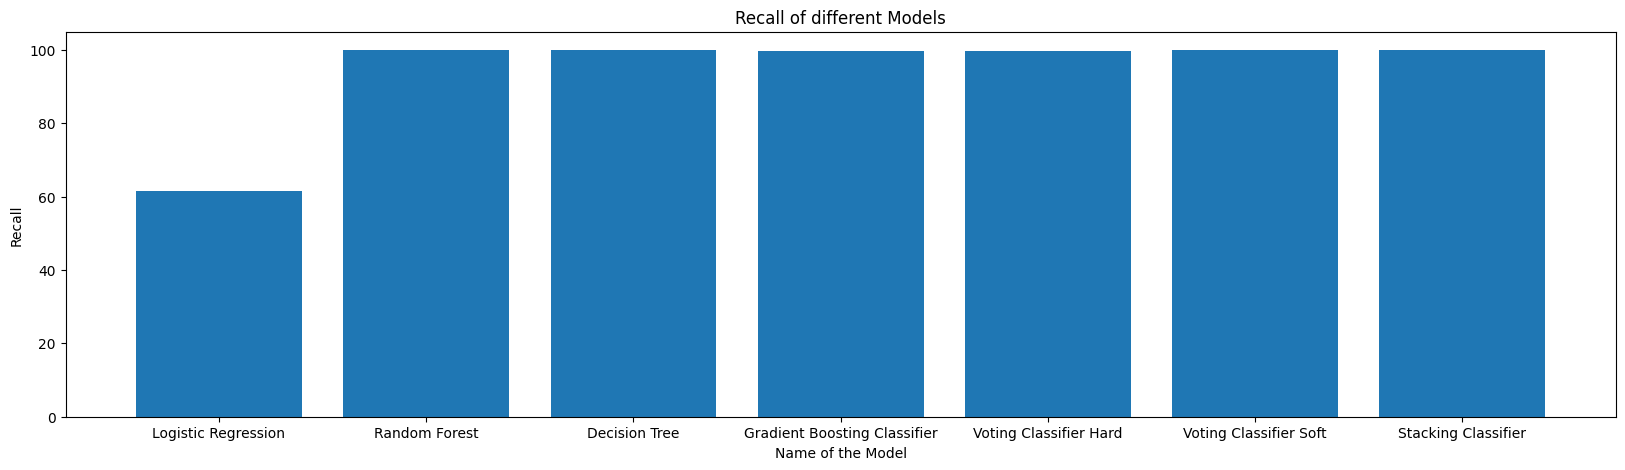

In [ ]:
plt.bar(Models, recallscore)
plt.xlabel('Name of the Model')
plt.ylabel('Recall')
plt.title("Recall of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

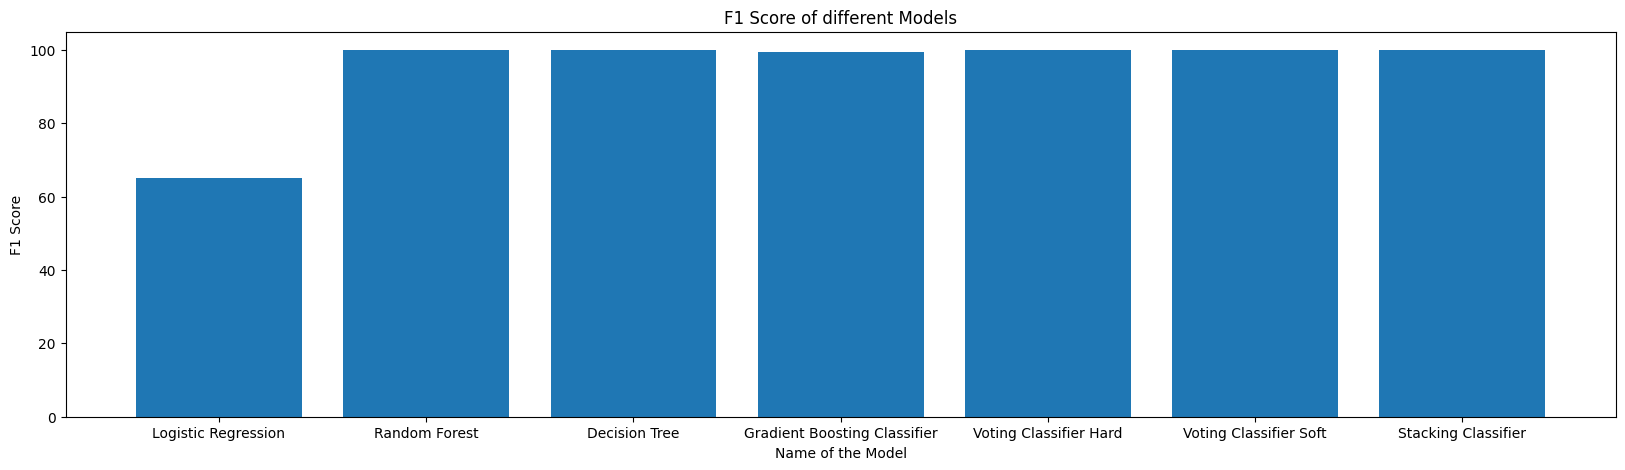

In [ ]:
plt.bar(Models, f1score)
plt.xlabel('Name of the Model')
plt.ylabel('F1 Score')
plt.title("F1 Score of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

# FEATURE SELECTION

# Chi Square Test

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

In [ ]:
#Chi-square Test

#The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target 
#and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared to test 
#the relation between various features in the dataset and the target variable


best_fea = SelectKBest(chi2,k=12)
kbest = best_fea.fit_transform(x,y)
np.array(data.drop(columns=['label']).columns)[best_fea.get_support()]

array(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec',
       'tot_dur', 'flows', 'pktrate', 'Pairflow', 'tx_bytes', 'rx_bytes'],
      dtype=object)

In [ ]:
# To keep the top 2 features with the strongest Pearson correlation with the target, we can run:
# from sklearn.feature_selection import r_regression, SelectKBest

# X_selection = SelectKBest(r_regression, k=2).fit_transform(X, y)
# Similarly, to keep the top 30% of features, we would run:
# 	from sklearn.feature_selection import r_regression, SelectPercentile

# 	X_selection = SelectPercentile(r_regression, percentile=30).fit_transform(X, y)

In [ ]:
pd.DataFrame(list(zip(data.drop(columns=['label']).columns, best_fea.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
3,bytecount,3410.326470
2,pktcount,3334.257358
7,flows,541.720689
0,dt,280.339096
4,dur,134.675872
6,tot_dur,134.504939
12,Pairflow,92.695272
15,rx_bytes,63.478359
14,tx_bytes,49.110377
5,dur_nsec,14.710743


In [ ]:
x_new = data[['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur','flows', 'Pairflow', 'tx_bytes', 'rx_bytes', 'switch', 'pktrate']]
y_new = data['label']

# Pearson Correlation

In [ ]:
from sklearn.feature_selection import r_regression, SelectPercentile


best_fea1 = SelectKBest(r_regression, k=12)
kbest1 = best_fea1.fit_transform(x, y)
np.array(data.drop(columns=['label']).columns)[best_fea1.get_support()]

array(['switch', 'pktcount', 'bytecount', 'dur_nsec', 'packetins',
       'pktperflow', 'byteperflow', 'pktrate', 'port_no', 'tx_kbps',
       'rx_kbps', 'tot_kbps'], dtype=object)

In [ ]:
pd.DataFrame(list(zip(data.drop(columns=['label']).columns, best_fea1.scores_)),columns=['features1','scores1']).sort_values(by='scores1',ascending=False)

,features1,scores1
2,pktcount,0.403217
3,bytecount,0.278051
11,pktrate,0.089801
9,pktperflow,0.089608
5,dur_nsec,0.029161
1,switch,0.027644
8,packetins,-0.002489
13,port_no,-0.002759
16,tx_kbps,-0.005646
17,rx_kbps,-0.006714


In [ ]:
x_new1 = data[['switch', 'pktcount', 'bytecount', 'dur_nsec', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'port_no', 'tx_kbps', 'rx_kbps', 'tot_kbps']]
y_new1 = data['label']

# SPLITING THE TRAIN AND TEST DATA

In [ ]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.30, random_state=0)

In [ ]:
x_new1_train, x_new1_test, y_new1_train, y_new1_test = train_test_split(x_new1, y_new1, test_size=0.30, random_state=0)

In [ ]:
precisionscorenew = []
recallscorenew = []
f1scorenew = []
accuracyscorenew = []

In [ ]:
precisionscorenew1 = []
recallscorenew1 = []
f1scorenew1 = []
accuracyscorenew1 = []

# LOGISTIC REGRESSION

In [ ]:
lr1 = LogisticRegression()
lr1.fit(x_new_train,y_new_train)

LogisticRegression()

In [ ]:
y2_pred_lr = lr1.predict(x_new_test)

In [ ]:
accuracy_score(y_new_test,y2_pred_lr)

0.6067989214175655


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.66      0.74      0.70     19190
           1       0.49      0.39      0.43     11962

    accuracy                           0.61     31152
   macro avg       0.57      0.57      0.57     31152
weighted avg       0.59      0.61      0.60     31152


CONFUSION MATRIX


<Axes: >

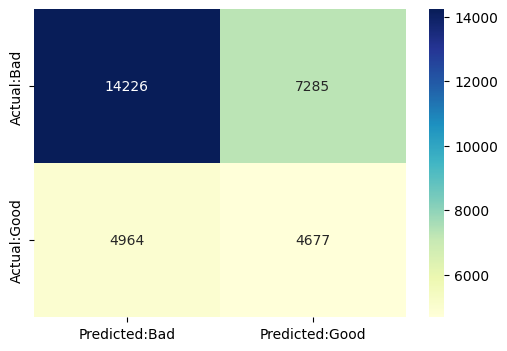

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(lr1.predict(x_new_test), y_new_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new_test,y2_pred_lr))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
lr1_cm = confusion_matrix(y2_pred_lr, y_new_test)
print(lr1_cm)

[[14226  7285]
 [ 4964  4677]]


In [ ]:
# lr = LogisticRegression(solver='liblinear',multi_class='ovr')
# lr.fit(x_new_train,y_new_train) 
# y_pred_lr = lr.predict(x_new_test)

In [ ]:
lr1_train, lr1_test = lr1.score(x_new_train , y_new_train), lr1.score(x_new_test , y_new_test)

In [ ]:
print('Accuracy_lr1:', accuracy_score(y_new_test, y2_pred_lr))
print('Precision_lr1:', precision_score(y_new_test, y2_pred_lr))
print('Recall_lr1:   ', recall_score(y_new_test, y2_pred_lr))
print('F1 Score_lr1: ', f1_score(y_new_test, y2_pred_lr))

Accuracy_lr1: 0.6067989214175655
Precision_lr1: 0.4851156519033295
Recall_lr1:    0.3909881290754055
F1 Score_lr1:  0.43299541730315233


In [ ]:
alr1 = round(accuracy_score(y_new_test, y2_pred_lr)*100, 2)
plr1 = round(precision_score(y_new_test, y2_pred_lr)*100, 2)
rlr1 = round(recall_score(y_new_test, y2_pred_lr)*100, 2)
f1lr1 = round(f1_score(y_new_test, y2_pred_lr)*100, 2)


accuracyscorenew.append(alr1)
precisionscorenew.append(plr1)
recallscorenew.append(rlr1)
f1scorenew.append(f1lr1)

In [ ]:
print("Train score is:", lr1.score(x_new_train, y_new_train))
print("Test score is:", lr1.score(x_new_test, y_new_test))

Train score is: 0.6081692737353309
Test score is: 0.6067989214175655


In [ ]:
lr11 = LogisticRegression()
lr11.fit(x_new1_train,y_new1_train)

y2_pred_lr1 = lr11.predict(x_new1_test)

accuracy_score(y_new1_test,y2_pred_lr1)

0.7148818695428865


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.74      0.82      0.78     19190
           1       0.65      0.55      0.60     11962

    accuracy                           0.71     31152
   macro avg       0.70      0.68      0.69     31152
weighted avg       0.71      0.71      0.71     31152


CONFUSION MATRIX
[[15712  5404]
 [ 3478  6558]]


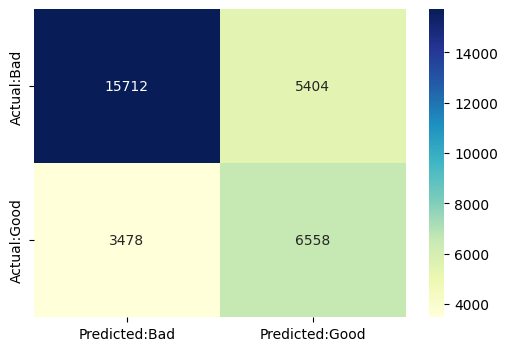

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(lr11.predict(x_new1_test), y_new1_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new1_test,y2_pred_lr1))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

lr1_cm = confusion_matrix(y2_pred_lr1, y_new1_test)
print(lr1_cm)

In [ ]:
lr11_train, lr11_test = lr11.score(x_new1_train , y_new1_train), lr11.score(x_new1_test , y_new1_test)

In [ ]:
print('Accuracy_lr11:', accuracy_score(y_new1_test, y2_pred_lr1))
print('Precision_lr11:', precision_score(y_new1_test, y2_pred_lr1))
print('Recall_lr11:   ', recall_score(y_new1_test, y2_pred_lr1))
print('F1 Score_lr11: ', f1_score(y_new1_test, y2_pred_lr1))

Accuracy_lr11: 0.7148818695428865
Precision_lr11: 0.6534475886807493
Recall_lr11:    0.5482360809229226
F1 Score_lr11:  0.596236021456496


In [ ]:
alr11 = round(accuracy_score(y_new1_test, y2_pred_lr1)*100, 2)
plr11 = round(precision_score(y_new1_test, y2_pred_lr1)*100, 2)
rlr11 = round(recall_score(y_new1_test, y2_pred_lr1)*100, 2)
f1lr11 = round(f1_score(y_new1_test, y2_pred_lr1)*100, 2)


accuracyscorenew1.append(alr11)
precisionscorenew1.append(plr11)
recallscorenew1.append(rlr11)
f1scorenew1.append(f1lr11)

In [ ]:
print("Train score is:", lr11.score(x_new1_train, y_new1_train))
print("Test score is:", lr11.score(x_new1_test, y_new1_test))

Train score is: 0.7154786963280917
Test score is: 0.7148818695428865


# RANDOM FOREST

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(x_new_train,y_new_train)

RandomForestClassifier()

In [ ]:
RF_pred_new = rf1.predict(x_new_test)

print(accuracy_score(y_new_test,RF_pred_new))

0.9999036979969184



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

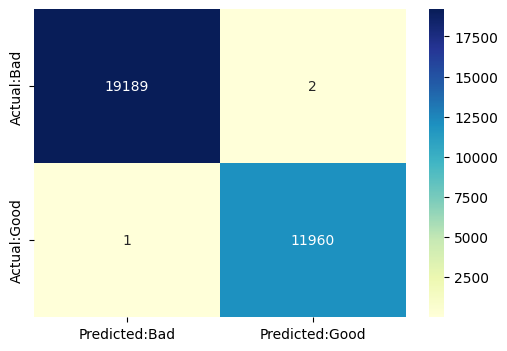

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(rf1.predict(x_new_test), y_new_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new_test,RF_pred_new))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
rf1_cm = confusion_matrix(RF_pred_new, y_new_test)
print(rf1_cm)

[[19189     2]
 [    1 11960]]


In [ ]:
rf1_train, rf1_test = rf1.score(x_new_train , y_new_train), rf1.score(x_new_test , y_new_test)

In [ ]:
print('Accuracy_rf1:', accuracy_score(y_new_test, RF_pred_new))
print('Precision_rf1:', precision_score(y_new_test, RF_pred_new))
print('Recall_rf1:   ', recall_score(y_new_test, RF_pred_new))
print('F1 Score_rf1: ', f1_score(y_new_test, RF_pred_new))

Accuracy_rf1: 0.9999036979969184
Precision_rf1: 0.999916394950255
Recall_rf1:    0.99983280387895
F1 Score_rf1:  0.9998745976675166


In [ ]:
arf1 = round(accuracy_score(y_new_test, RF_pred_new)*100, 2)
prf1 = round(precision_score(y_new_test, RF_pred_new)*100, 2)
rrf1 = round(recall_score(y_new_test, RF_pred_new)*100, 2)
f1rf1 = round(f1_score(y_new_test, RF_pred_new)*100, 2)


accuracyscorenew.append(arf1)
precisionscorenew.append(prf1)
recallscorenew.append(rrf1)
f1scorenew.append(f1rf1)

In [ ]:
print("Train score is:", rf1.score(x_new_train, y_new_train))
print("Test score is:", rf1.score(x_new_test, y_new_test))

Train score is: 1.0
Test score is: 0.9999036979969184


In [ ]:
rf11 = RandomForestClassifier()
rf11.fit(x_new1_train,y_new1_train)

RF_pred_new1 = rf11.predict(x_new1_test)

print(accuracy_score(y_new1_test,RF_pred_new1))

0.9999357986646122



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX
[[19189     1]
 [    1 11961]]


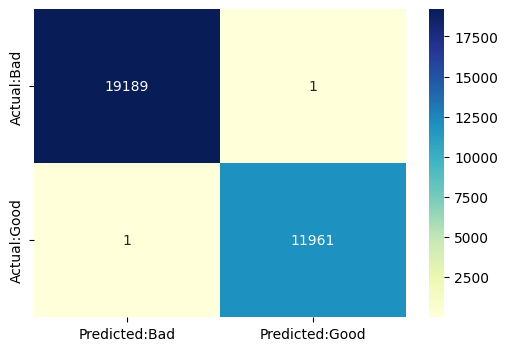

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(rf11.predict(x_new1_test), y_new1_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new1_test,RF_pred_new1))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

rf11_cm = confusion_matrix(RF_pred_new1, y_new1_test)
print(rf11_cm)

In [ ]:
rf11_train, rf11_test = rf11.score(x_new1_train , y_new1_train), rf11.score(x_new1_test , y_new1_test)

In [ ]:
print('Accuracy_rf11:', accuracy_score(y_new1_test, RF_pred_new1))
print('Precision_rf11:', precision_score(y_new1_test, RF_pred_new1))
print('Recall_rf11:   ', recall_score(y_new1_test, RF_pred_new1))
print('F1 Score_rf11: ', f1_score(y_new1_test, RF_pred_new1))

Accuracy_rf11: 0.9999357986646122
Precision_rf11: 0.999916401939475
Recall_rf11:    0.999916401939475
F1 Score_rf11:  0.999916401939475


In [ ]:
arf11 = round(accuracy_score(y_new1_test, RF_pred_new1)*100, 2)
prf11 = round(precision_score(y_new1_test, RF_pred_new1)*100, 2)
rrf11 = round(recall_score(y_new1_test, RF_pred_new1)*100, 2)
f1rf11 = round(f1_score(y_new1_test, RF_pred_new1)*100, 2)


accuracyscorenew1.append(arf11)
precisionscorenew1.append(prf11)
recallscorenew1.append(rrf11)
f1scorenew1.append(f1rf11)

In [ ]:
print("Train score is:", rf11.score(x_new1_train, y_new1_train))
print("Test score is:", rf11.score(x_new1_test, y_new1_test))

Train score is: 1.0
Test score is: 0.9999357986646122


# DECISION TREE

In [ ]:
dt1 = DecisionTreeClassifier()
dt1.fit(x_new_train, y_new_train)

DecisionTreeClassifier()

In [ ]:
dt_y_pred1 = dt1.predict(x_new_test)

In [ ]:
print(accuracy_score(y_new_test,dt_y_pred1))

0.9997431946584489



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

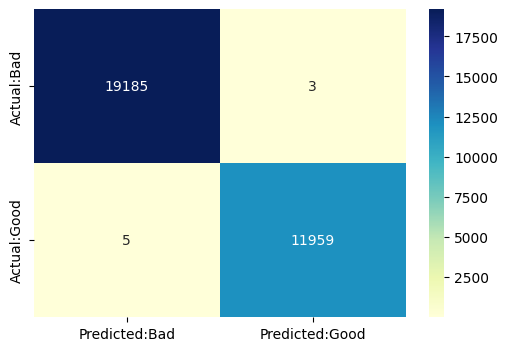

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(dt1.predict(x_new_test), y_new_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new_test,dt_y_pred1))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
dt1_cm = confusion_matrix(dt_y_pred1, y_new_test)
print(dt1_cm)

[[19185     3]
 [    5 11959]]


In [ ]:
dt1_train, dt1_test = dt1.score(x_new_train , y_new_train), dt1.score(x_new_test , y_new_test)

In [ ]:
print('Accuracy_dt1:', accuracy_score(y_new_test, dt_y_pred1))
print('Precision_dt1:', precision_score(y_new_test, dt_y_pred1))
print('Recall_dt1:   ', recall_score(y_new_test, dt_y_pred1))
print('F1 Score_dt1: ', f1_score(y_new_test, dt_y_pred1))

Accuracy_dt1: 0.9997431946584489
Precision_dt1: 0.9995820795720495
Recall_dt1:    0.999749205818425
F1 Score_dt1:  0.9996656357101061


In [ ]:
adt1 = round(accuracy_score(y_new_test, dt_y_pred1)*100, 2)
pdt1 = round(precision_score(y_new_test, dt_y_pred1)*100, 2)
rdt1 = round(recall_score(y_new_test, dt_y_pred1)*100, 2)
f1dt1 = round(f1_score(y_new_test, dt_y_pred1)*100, 2)


accuracyscorenew.append(adt1)
precisionscorenew.append(pdt1)
recallscorenew.append(rdt1)
f1scorenew.append(f1dt1)

In [ ]:
print("Train score is:", dt1.score(x_new_train, y_new_train))
print("Test score is:", dt1.score(x_new_test, y_new_test))

Train score is: 1.0
Test score is: 0.9997431946584489


In [ ]:
dt11 = DecisionTreeClassifier()
dt11.fit(x_new1_train, y_new1_train)

dt_y_pred11 = dt11.predict(x_new1_test)

print(accuracy_score(y_new1_test,dt_y_pred11))

0.9999357986646122



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX
[[19189     1]
 [    1 11961]]


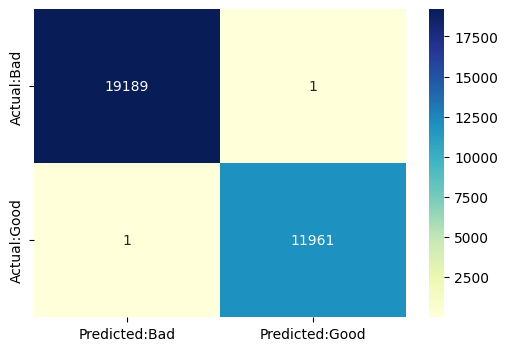

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(dt11.predict(x_new1_test), y_new1_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new1_test,dt_y_pred11))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

dt11_cm = confusion_matrix(dt_y_pred11, y_new1_test)
print(dt11_cm)

In [ ]:
dt11_train, dt11_test = dt11.score(x_new1_train , y_new1_train), dt11.score(x_new1_test , y_new1_test)

In [ ]:
print('Accuracy_dt11:', accuracy_score(y_new1_test, dt_y_pred11))
print('Precision_dt11:', precision_score(y_new1_test, dt_y_pred11))
print('Recall_dt11:   ', recall_score(y_new1_test, dt_y_pred11))
print('F1 Score_dt11: ', f1_score(y_new1_test, dt_y_pred11))

Accuracy_dt11: 0.9999357986646122
Precision_dt11: 0.999916401939475
Recall_dt11:    0.999916401939475
F1 Score_dt11:  0.999916401939475


In [ ]:
adt11 = round(accuracy_score(y_new1_test, dt_y_pred11)*100, 2)
pdt11 = round(precision_score(y_new1_test, dt_y_pred11)*100, 2)
rdt11 = round(recall_score(y_new1_test, dt_y_pred11)*100, 2)
f1dt11 = round(f1_score(y_new1_test, dt_y_pred11)*100, 2)


accuracyscorenew1.append(adt11)
precisionscorenew1.append(pdt11)
recallscorenew1.append(rdt11)
f1scorenew1.append(f1dt11)

In [ ]:
print("Train score is:", dt11.score(x_new1_train, y_new1_train))
print("Test score is:", dt11.score(x_new1_test, y_new1_test))

Train score is: 1.0
Test score is: 0.9999357986646122


# GRADIENT BOOSTING CLASSIFIER

In [ ]:
gbc1 = GradientBoostingClassifier()
gbc1.fit(x_new_train, y_new_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc1 = gbc1.predict(x_new_test)

In [ ]:
print(accuracy_score(y_new_test,y_pred_gbc1))

0.9888931689779148



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19190
           1       0.98      1.00      0.99     11962

    accuracy                           0.99     31152
   macro avg       0.99      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152


CONFUSION MATRIX


<Axes: >

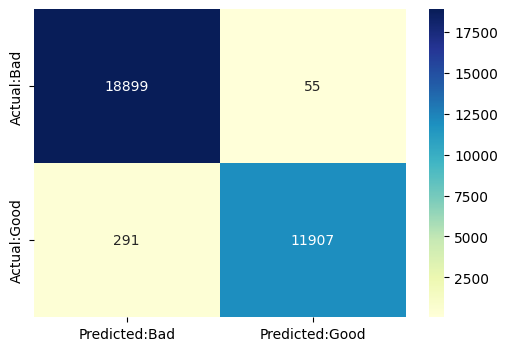

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(gbc1.predict(x_new_test), y_new_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new_test,y_pred_gbc1))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
gbc1_cm = confusion_matrix(y_pred_gbc1, y_new_test)
print(gbc1_cm)

[[18899    55]
 [  291 11907]]


In [ ]:
gbc1_train, gbc1_test = gbc1.score(x_new_train , y_new_train), gbc1.score(x_new_test , y_new_test)

In [ ]:
print('Accuracy_gbc1:', accuracy_score(y_new_test, y_pred_gbc1))
print('Precision_gbc1:', precision_score(y_new_test, y_pred_gbc1))
print('Recall_gbc1:   ', recall_score(y_new_test, y_pred_gbc1))
print('F1 Score_gbc1: ', f1_score(y_new_test, y_pred_gbc1))

Accuracy_gbc1: 0.9888931689779148
Precision_gbc1: 0.9761436301032956
Recall_gbc1:    0.9954021066711253
F1 Score_gbc1:  0.9856788079470199


In [ ]:
agbc1 = round(accuracy_score(y_new_test, y_pred_gbc1)*100, 2)
pgbc1 = round(precision_score(y_new_test, y_pred_gbc1)*100, 2)
rgbc1 = round(recall_score(y_new_test, y_pred_gbc1)*100, 2)
f1gbc1 = round(f1_score(y_new_test, y_pred_gbc1)*100, 2)


accuracyscorenew.append(agbc1)
precisionscorenew.append(pgbc1)
recallscorenew.append(rgbc1)
f1scorenew.append(f1gbc1)

In [ ]:
print("Train score is:", gbc1.score(x_new_train, y_new_train))
print("Test score is:", gbc1.score(x_new_test, y_new_test))

Train score is: 0.9896405134343143
Test score is: 0.9888931689779148


In [ ]:
gbc11 = GradientBoostingClassifier()
gbc11.fit(x_new1_train, y_new1_train)

y_pred_gbc11 = gbc11.predict(x_new1_test)

print(accuracy_score(y_new1_test,y_pred_gbc11))

0.9954738058551618



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       0.99      1.00      0.99     11962

    accuracy                           1.00     31152
   macro avg       0.99      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX
[[19102    53]
 [   88 11909]]


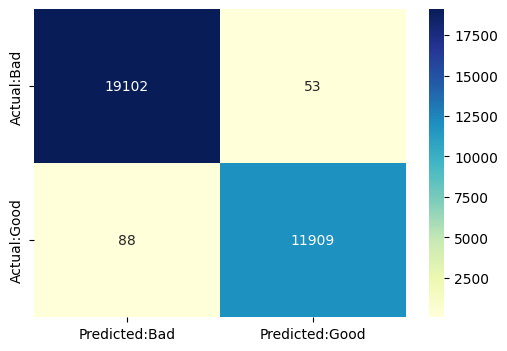

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(gbc11.predict(x_new1_test), y_new1_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new1_test,y_pred_gbc11))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

gbc11_cm = confusion_matrix(y_pred_gbc11, y_new1_test)
print(gbc11_cm)

In [ ]:
gbc11_train, gbc11_test = gbc11.score(x_new1_train , y_new1_train), gbc11.score(x_new1_test , y_new1_test)

In [ ]:
print('Accuracy_gbc1:', accuracy_score(y_new1_test, y_pred_gbc11))
print('Precision_gbc1:', precision_score(y_new1_test, y_pred_gbc11))
print('Recall_gbc1:   ', recall_score(y_new1_test, y_pred_gbc11))
print('F1 Score_gbc1: ', f1_score(y_new1_test, y_pred_gbc11))

Accuracy_gbc1: 0.9954738058551618
Precision_gbc1: 0.9926648328748854
Recall_gbc1:    0.9955693027921753
F1 Score_gbc1:  0.9941149463667098


In [ ]:
agbc11 = round(accuracy_score(y_new1_test, y_pred_gbc11)*100, 2)
pgbc11 = round(precision_score(y_new1_test, y_pred_gbc11)*100, 2)
rgbc11 = round(recall_score(y_new1_test, y_pred_gbc11)*100, 2)
f1gbc11 = round(f1_score(y_new1_test, y_pred_gbc11)*100, 2)


accuracyscorenew1.append(agbc11)
precisionscorenew1.append(pgbc11)
recallscorenew1.append(rgbc11)
f1scorenew1.append(f1gbc11)

In [ ]:
print("Train score is:", gbc11.score(x_new1_train, y_new1_train))
print("Test score is:", gbc11.score(x_new1_test, y_new1_test))

Train score is: 0.9959965330801932
Test score is: 0.9954738058551618


# ENSEMBLE MODELS USING VOTING CLASSIFIER NEW

In [ ]:
vch_1 = VotingClassifier([('clf1', lr1), ('clf2', rf1)])
cross_val_score(vch_1, x_new, y_new).mean()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7456152687537706

In [ ]:
vch_2 = VotingClassifier([('clf1', rf1), ('clf2', dt1)])
cross_val_score(vch_2, x_new, y_new).mean()

0.8254225648610012

In [ ]:
vch_3 = VotingClassifier([('clf1', rf1), ('clf2', gbc1)])
cross_val_score(vch_3, x_new, y_new).mean()

0.8519152449813149

In [ ]:
vch_4 = VotingClassifier([('clf1', dt1), ('clf2', gbc1)])
cross_val_score(vch_4, x_new, y_new).mean()

0.8302277338565253

In [ ]:
vch_5 = VotingClassifier([('clf1', lr1), ('clf2', rf1), ('clf3', gbc1)])
cross_val_score(vch_5, x_new, y_new).mean()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8384811438387161

In [ ]:
vch_11 = VotingClassifier([('clf1', lr11), ('clf2', rf11)])
cross_val_score(vch_11, x_new1, y_new1).mean()

0.7551204781787925

In [ ]:
vch_21 = VotingClassifier([('clf1', rf11), ('clf2', dt11)])
cross_val_score(vch_21, x_new1, y_new1).mean()

0.9482183137055997

In [ ]:
vch_31 = VotingClassifier([('clf1', rf11), ('clf2', gbc11)])
cross_val_score(vch_31, x_new1, y_new1).mean()

0.958214518200063

In [ ]:
vch_41 = VotingClassifier([('clf1', dt11), ('clf2', gbc11)])
cross_val_score(vch_41, x_new1, y_new1).mean()

0.9472841949414084

In [ ]:
vch_51 = VotingClassifier([('clf1', lr11), ('clf2', rf11), ('clf3', gbc11)])
cross_val_score(vch_51, x_new1, y_new1).mean()

0.9538713011071629

# VOTING CLASSIFIER

# Hard Voting

In [ ]:
vc_hard1 = VotingClassifier([('clf1', rf1), ('clf2', gbc1)], voting = 'hard')

In [ ]:
vc_hard1.fit(x_new_train, y_new_train)
y_pred_h1 = vc_hard1.predict(x_new_test)

In [ ]:
print(accuracy_score(y_new_test, y_pred_h1))

0.9981381612737545



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

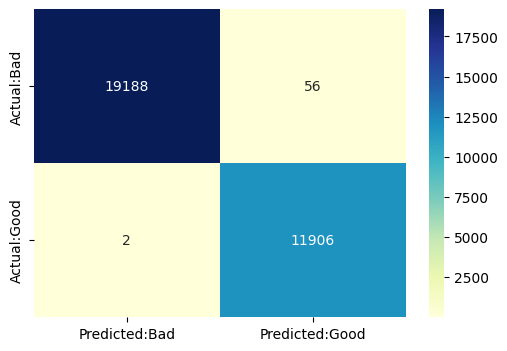

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vc_hard1.predict(x_new_test), y_new_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new_test,y_pred_h1))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
vch1_cm = confusion_matrix(y_pred_h1, y_new_test)
print(vch1_cm)

[[19188    56]
 [    2 11906]]


In [ ]:
vch1_train, vch1_test = vc_hard1.score(x_new_train , y_new_train), vc_hard1.score(x_new_test , y_new_test)

In [ ]:
print('Accuracy_vch1:', accuracy_score(y_new_test, y_pred_h1))
print('Precision_vch1:', precision_score(y_new_test, y_pred_h1))
print('Recall_vch1:   ', recall_score(y_new_test, y_pred_h1))
print('F1 Score_vch1: ', f1_score(y_new_test, y_pred_h1))

Accuracy_vch1: 0.9981381612737545
Precision_vch1: 0.9998320456835741
Recall_vch1:    0.9953185086106002
F1 Score_vch1:  0.9975701717637202


In [ ]:
avch1 = round(accuracy_score(y_new_test, y_pred_h1)*100, 2)
pvch1 = round(precision_score(y_new_test, y_pred_h1)*100, 2)
rvch1 = round(recall_score(y_new_test, y_pred_h1)*100, 2)
f1vch1 = round(f1_score(y_new_test, y_pred_h1)*100, 2)


accuracyscorenew.append(avch1)
precisionscorenew.append(pvch1)
recallscorenew.append(rvch1)
f1scorenew.append(f1vch1)

In [ ]:
print("Train score is:", vc_hard1.score(x_new_train, y_new_train))
print("Test score is:", vc_hard1.score(x_new_test, y_new_test))

Train score is: 0.9985967229353254
Test score is: 0.9981381612737545


In [ ]:
vc_hard11 = VotingClassifier([('clf1', rf11), ('clf2', gbc11)], voting = 'hard')

vc_hard11.fit(x_new1_train, y_new1_train)
y_pred_h11 = vc_hard11.predict(x_new1_test)

print(accuracy_score(y_new1_test, y_pred_h11))

0.9982986646122239



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX
[[19190    53]
 [    0 11909]]


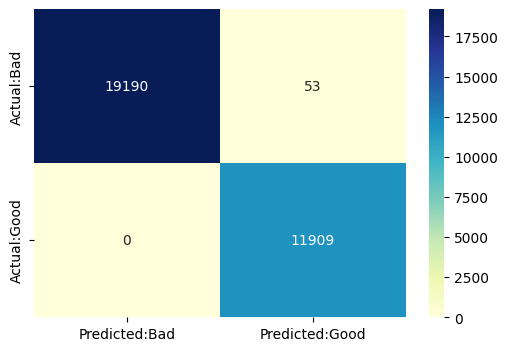

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vc_hard11.predict(x_new1_test), y_new1_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new1_test,y_pred_h11))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

vch11_cm = confusion_matrix(y_pred_h11, y_new1_test)
print(vch11_cm)

In [ ]:
vch11_train, vch11_test = vc_hard11.score(x_new1_train , y_new1_train), vc_hard11.score(x_new1_test , y_new1_test)

In [ ]:
print('Accuracy_vch1:', accuracy_score(y_new1_test, y_pred_h11))
print('Precision_vch1:', precision_score(y_new1_test, y_pred_h11))
print('Recall_vch1:   ', recall_score(y_new1_test, y_pred_h11))
print('F1 Score_vch1: ', f1_score(y_new1_test, y_pred_h11))

Accuracy_vch1: 0.9982986646122239
Precision_vch1: 1.0
Recall_vch1:    0.9955693027921753
F1 Score_vch1:  0.9977797327300909


In [ ]:
avch11 = round(accuracy_score(y_new1_test, y_pred_h11)*100, 2)
pvch11 = round(precision_score(y_new1_test, y_pred_h11)*100, 2)
rvch11 = round(recall_score(y_new1_test, y_pred_h11)*100, 2)
f1vch11 = round(f1_score(y_new1_test, y_pred_h11)*100, 2)


accuracyscorenew1.append(avch11)
precisionscorenew1.append(pvch11)
recallscorenew1.append(rvch11)
f1scorenew1.append(f1vch11)

In [ ]:
print("Train score is:", vc_hard11.score(x_new1_train, y_new1_train))
print("Test score is:", vc_hard11.score(x_new1_test, y_new1_test))

Train score is: 0.9983353281879841
Test score is: 0.9982986646122239


# Soft Voting

In [ ]:
vc_soft1 = VotingClassifier([('clf1', rf1), ('clf2', gbc1)], voting = 'soft')
vc_soft1.fit(x_new_train, y_new_train)
y_pred_s1 = vc_soft1.predict(x_new_test)

In [ ]:
print(accuracy_score(y_new_test, y_pred_s1))

0.9991653826399589



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

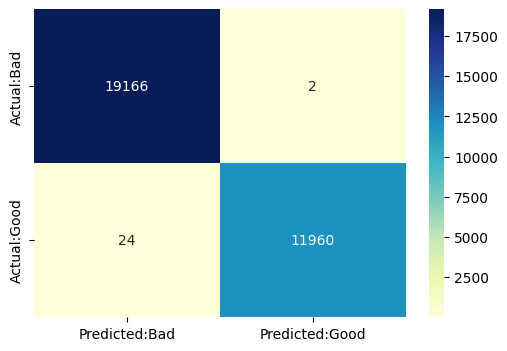

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vc_soft1.predict(x_new_test), y_new_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new_test,y_pred_s1))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
vcs1_cm = confusion_matrix(y_pred_s1, y_new_test)
print(vcs1_cm)

[[19166     2]
 [   24 11960]]


In [ ]:
vcs1_train, vcs1_test = vc_soft1.score(x_new_train , y_new_train), vc_soft1.score(x_new_test , y_new_test)

In [ ]:
print('Accuracy_vcs1:', accuracy_score(y_new_test, y_pred_s1))
print('Precision_vcs1:', precision_score(y_new_test, y_pred_s1))
print('Recall_vcs1:   ', recall_score(y_new_test, y_pred_s1))
print('F1 Score_vcs1: ', f1_score(y_new_test, y_pred_s1))

Accuracy_vcs1: 0.9991653826399589
Precision_vcs1: 0.9979973297730307
Recall_vcs1:    0.99983280387895
F1 Score_vcs1:  0.998914223669924


In [ ]:
avcs1 = round(accuracy_score(y_new_test, y_pred_s1)*100, 2)
pvcs1 = round(precision_score(y_new_test, y_pred_s1)*100, 2)
rvcs1 = round(recall_score(y_new_test, y_pred_s1)*100, 2)
f1vcs1 = round(f1_score(y_new_test, y_pred_s1)*100, 2)


accuracyscorenew.append(avcs1)
precisionscorenew.append(pvcs1)
recallscorenew.append(rvcs1)
f1scorenew.append(f1vcs1)

In [ ]:
print("Train score is:", vc_soft1.score(x_new_train, y_new_train))
print("Test score is:", vc_soft1.score(x_new_test, y_new_test))

Train score is: 0.9998073933440643
Test score is: 0.9991653826399589


In [ ]:
vc_soft11 = VotingClassifier([('clf1', rf11), ('clf2', gbc11)], voting = 'soft')
vc_soft11.fit(x_new1_train, y_new1_train)
y_pred_s11 = vc_soft11.predict(x_new1_test)

print(accuracy_score(y_new1_test, y_pred_s11))

0.9996789933230611



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX
[[19184     4]
 [    6 11958]]


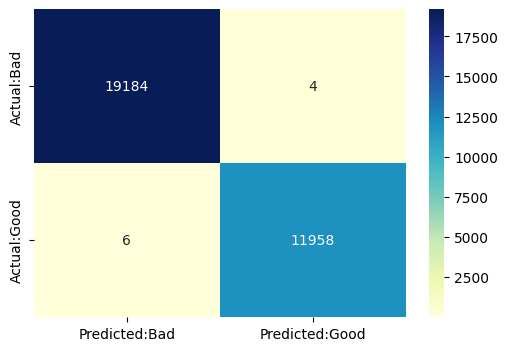

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vc_soft11.predict(x_new1_test), y_new1_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new1_test,y_pred_s11))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

vcs11_cm = confusion_matrix(y_pred_s11, y_new1_test)
print(vcs11_cm)

In [ ]:
vcs11_train, vcs11_test = vc_soft11.score(x_new1_train , y_new1_train), vc_soft11.score(x_new1_test , y_new1_test)

In [ ]:
print('Accuracy_vcs11:', accuracy_score(y_new1_test, y_pred_s11))
print('Precision_vcs11:', precision_score(y_new1_test, y_pred_s11))
print('Recall_vcs11:   ', recall_score(y_new1_test, y_pred_s11))
print('F1 Score_vcs11: ', f1_score(y_new1_test, y_pred_s11))

Accuracy_vcs11: 0.9996789933230611
Precision_vcs11: 0.9994984954864594
Recall_vcs11:    0.9996656077579
F1 Score_vcs11:  0.9995820446376328


In [ ]:
avcs11 = round(accuracy_score(y_new1_test, y_pred_s11)*100, 2)
pvcs11 = round(precision_score(y_new1_test, y_pred_s11)*100, 2)
rvcs11 = round(recall_score(y_new1_test, y_pred_s11)*100, 2)
f1vcs11 = round(f1_score(y_new1_test, y_pred_s11)*100, 2)


accuracyscorenew1.append(avcs11)
precisionscorenew1.append(pvcs11)
recallscorenew1.append(rvcs11)
f1scorenew1.append(f1vcs11)

In [ ]:
print("Train score is:", vc_soft11.score(x_new1_train, y_new1_train))
print("Test score is:", vc_soft11.score(x_new1_test, y_new1_test))

Train score is: 0.9999174542903133
Test score is: 0.9996789933230611


# STACKING CLASSIFIER

In [ ]:
sm1 = StackingClassifier(
    [('clf1', rf1), ('clf2', dt1), ('clf3', gbc1)], final_estimator = LogisticRegression()
)

In [ ]:
sm1.fit(x_new_train, y_new_train)

StackingClassifier(estimators=[('clf1', RandomForestClassifier()),
                               ('clf2', DecisionTreeClassifier()),
                               ('clf3', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_sm1 = sm1.predict(x_new_test)

In [ ]:
print(accuracy_score(y_new_test,y_pred_sm1))

0.9999036979969184



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX


<Axes: >

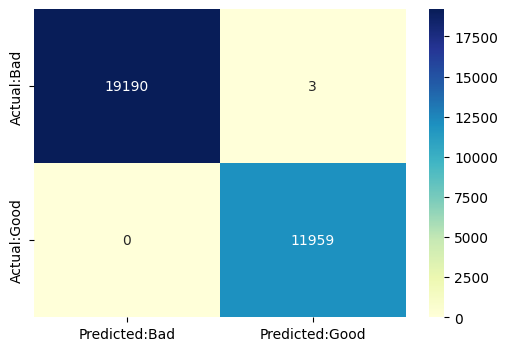

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(sm1.predict(x_new_test), y_new_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new_test,y_pred_sm1))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
sm1_cm = confusion_matrix(y_pred_sm1, y_new_test)
print(sm1_cm)

[[19190     3]
 [    0 11959]]


In [ ]:
print("Train score is:", sm1.score(x_new_train, y_new_train))
print("Test score is:", sm1.score(x_new_test, y_new_test))

Train score is: 1.0
Test score is: 0.9999036979969184


In [ ]:
sc1_train, sc1_test = sm1.score(x_new_train , y_new_train), sm1.score(x_new_test , y_new_test)

In [ ]:
print('Accuracy_sc1:', accuracy_score(y_new_test, y_pred_sm1))
print('Precision_sc1:', precision_score(y_new_test, y_pred_sm1))
print('Recall_sc1:   ', recall_score(y_new_test, y_pred_sm1))
print('F1 Score_sc1: ', f1_score(y_new_test, y_pred_sm1))

Accuracy_sc1: 0.9999036979969184
Precision_sc1: 1.0
Recall_sc1:    0.999749205818425
F1 Score_sc1:  0.9998745871828101


In [ ]:
asc1 = round(accuracy_score(y_new_test, y_pred_sm1)*100, 2)
psc1 = round(precision_score(y_new_test, y_pred_sm1)*100, 2)
rsc1 = round(recall_score(y_new_test, y_pred_sm1)*100, 2)
f1sc1 = round(f1_score(y_new_test, y_pred_sm1)*100, 2)


accuracyscorenew.append(asc1)
precisionscorenew.append(psc1)
recallscorenew.append(rsc1)
f1scorenew.append(f1sc1)

In [ ]:
print("Train score is:", sm1.score(x_new_train, y_new_train))
print("Test score is:", sm1.score(x_new_test, y_new_test))

Train score is: 1.0
Test score is: 0.9999036979969184


In [ ]:
sm11 = StackingClassifier(
    [('clf1', rf11), ('clf2', dt11), ('clf3', gbc11)], final_estimator = LogisticRegression()
)

sm11.fit(x_new1_train, y_new1_train)

y_pred_sm11 = sm11.predict(x_new1_test)

print(accuracy_score(y_new1_test,y_pred_sm11))

0.9999678993323061



CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19190
           1       1.00      1.00      1.00     11962

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152


CONFUSION MATRIX
[[19190     1]
 [    0 11961]]


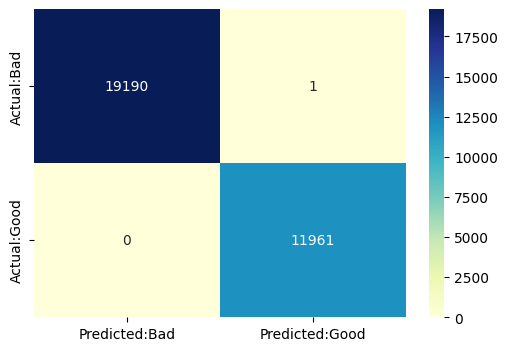

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(sm11.predict(x_new1_test), y_new1_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_new1_test,y_pred_sm11))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

sm11_cm = confusion_matrix(y_pred_sm11, y_new1_test)
print(sm11_cm)

In [ ]:
sc11_train, sc11_test = sm11.score(x_new1_train , y_new1_train), sm11.score(x_new1_test , y_new1_test)

In [ ]:
print("Train score is:", sm11.score(x_new1_train, y_new1_train))
print("Test score is:", sm11.score(x_new1_test, y_new1_test))

Train score is: 1.0
Test score is: 0.9999678993323061


In [ ]:
print('Accuracy_sc11:', accuracy_score(y_new1_test, y_pred_sm11))
print('Precision_sc11:', precision_score(y_new1_test, y_pred_sm11))
print('Recall_sc11:   ', recall_score(y_new1_test, y_pred_sm11))
print('F1 Score_sc11: ', f1_score(y_new1_test, y_pred_sm11))

Accuracy_sc11: 0.9999678993323061
Precision_sc11: 1.0
Recall_sc11:    0.999916401939475
F1 Score_sc11:  0.9999581992225056


In [ ]:
asc11 = round(accuracy_score(y_new1_test, y_pred_sm11)*100, 2)
psc11 = round(precision_score(y_new1_test, y_pred_sm11)*100, 2)
rsc11 = round(recall_score(y_new1_test, y_pred_sm11)*100, 2)
f1sc11 = round(f1_score(y_new1_test, y_pred_sm11)*100, 2)


accuracyscorenew1.append(asc11)
precisionscorenew1.append(psc11)
recallscorenew1.append(rsc11)
f1scorenew1.append(f1sc11)

In [ ]:
print("Train score is:", sm11.score(x_new1_train, y_new1_train))
print("Test score is:", sm11.score(x_new1_test, y_new1_test))

Train score is: 1.0
Test score is: 0.9999678993323061


# MODEL TABLE NEW

In [ ]:
data_table1 = [["Logistic Regression", lr1_train, lr1_test], 
        ["Random Forest", rf1_train, rf1_test],
        ["Decision Tree", dt1_train, dt1_test],
        ["Gradient Boosting Classifier", gbc1_train, gbc1_test],
        ["Voting Classifier Hard", vch1_train, vch1_test],
        ["Voting Classifier Soft", vcs1_train, vcs1_test],
        ["Stacking Classifier", sc1_train, sc1_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data_table1, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════════╤═══════════════╤══════════════╕
│ Model                        │   Train Score │   Test Score │
╞══════════════════════════════╪═══════════════╪══════════════╡
│ Logistic Regression          │      0.608169 │     0.606799 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Random Forest                │      1        │     0.999904 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Decision Tree                │      1        │     0.999743 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Gradient Boosting Classifier │      0.989641 │     0.988893 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Voting Classifier Hard       │      0.998597 │     0.998138 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Voting Classifier Soft       │      0.999807 │     0.999165 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Stacking Classifier          │      1 

In [ ]:
result_table1 = [["Logistic Regression", plr1, rlr1, f1lr1], 
        ["Random Forest", prf1, rrf1, f1rf1],
        ["Decision Tree", pdt1, rdt1, f1dt1],
        ["Gradient Boosting Classifier", pgbc1, rgbc1, f1gbc1],
        ["Voting Classifier Hard", pvch1, rvch1, f1vch1],
        ["Voting Classifier Soft", pvcs1, rvcs1, f1vcs1],
        ["Stacking Classifier", psc1, rsc1, f1sc1]]

col_names = ["Model", "Precision", "Recall", "F1 Score"]
print(tabulate(result_table1, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════════╤═════════════╤══════════╤════════════╕
│ Model                        │   Precision │   Recall │   F1 Score │
╞══════════════════════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression          │       48.51 │    39.1  │      43.3  │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Random Forest                │       99.99 │    99.98 │      99.99 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree                │       99.96 │    99.97 │      99.97 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting Classifier │       97.61 │    99.54 │      98.57 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Voting Classifier Hard       │       99.98 │    99.53 │      99.76 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Voting Classifier Soft       │       99.8  │    99.98 │      99.89 │
├─────

In [ ]:
accuracyscorenew

[60.68, 99.99, 99.97, 98.89, 99.81, 99.92, 99.99]

In [ ]:
precisionscorenew

[48.51, 99.99, 99.96, 97.61, 99.98, 99.8, 100.0]

In [ ]:
recallscorenew

[39.1, 99.98, 99.97, 99.54, 99.53, 99.98, 99.97]

In [ ]:
f1scorenew

[43.3, 99.99, 99.97, 98.57, 99.76, 99.89, 99.99]

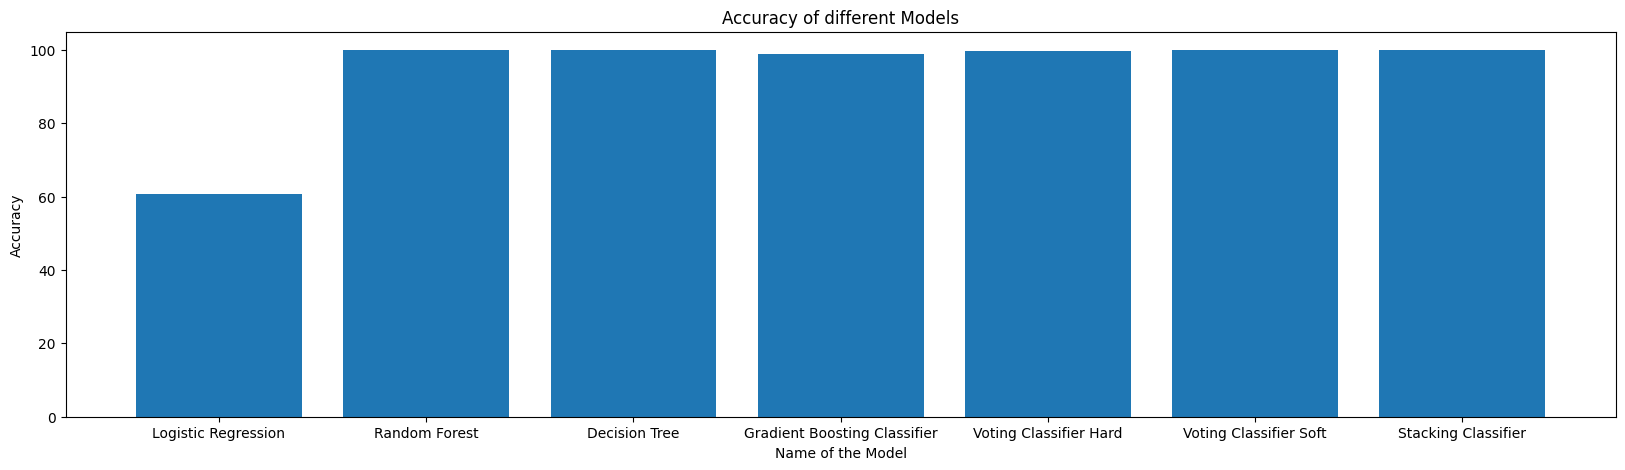

In [ ]:
plt.bar(Models, accuracyscorenew)
plt.xlabel('Name of the Model')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

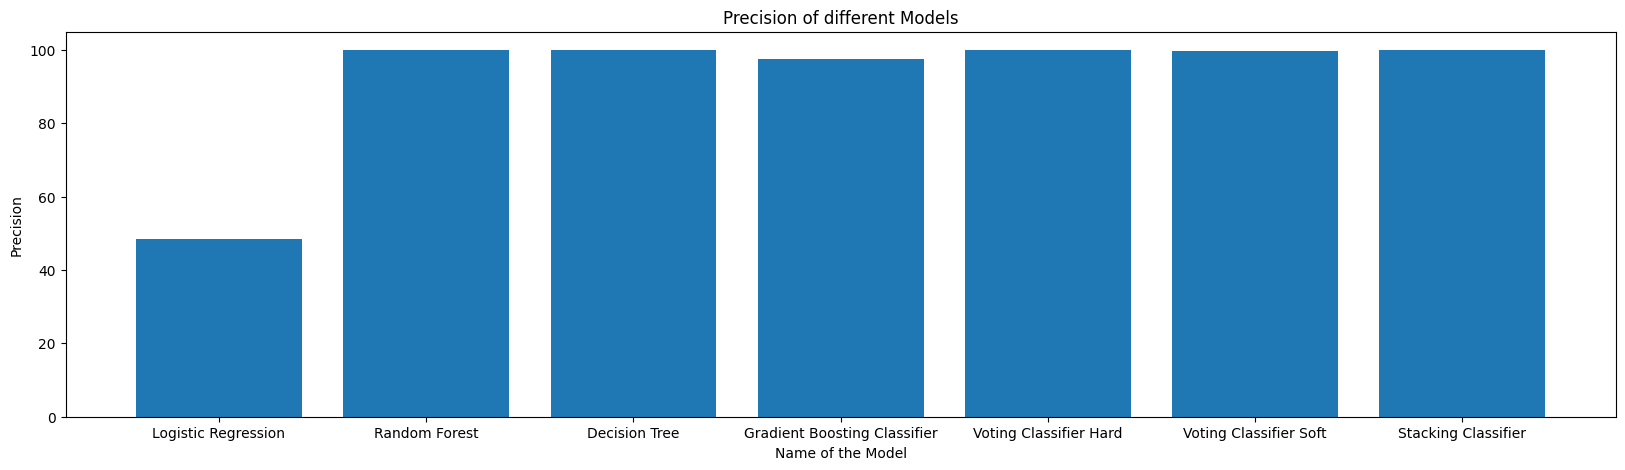

In [ ]:
plt.bar(Models, precisionscorenew)
plt.xlabel('Name of the Model')
plt.ylabel('Precision')
plt.title("Precision of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

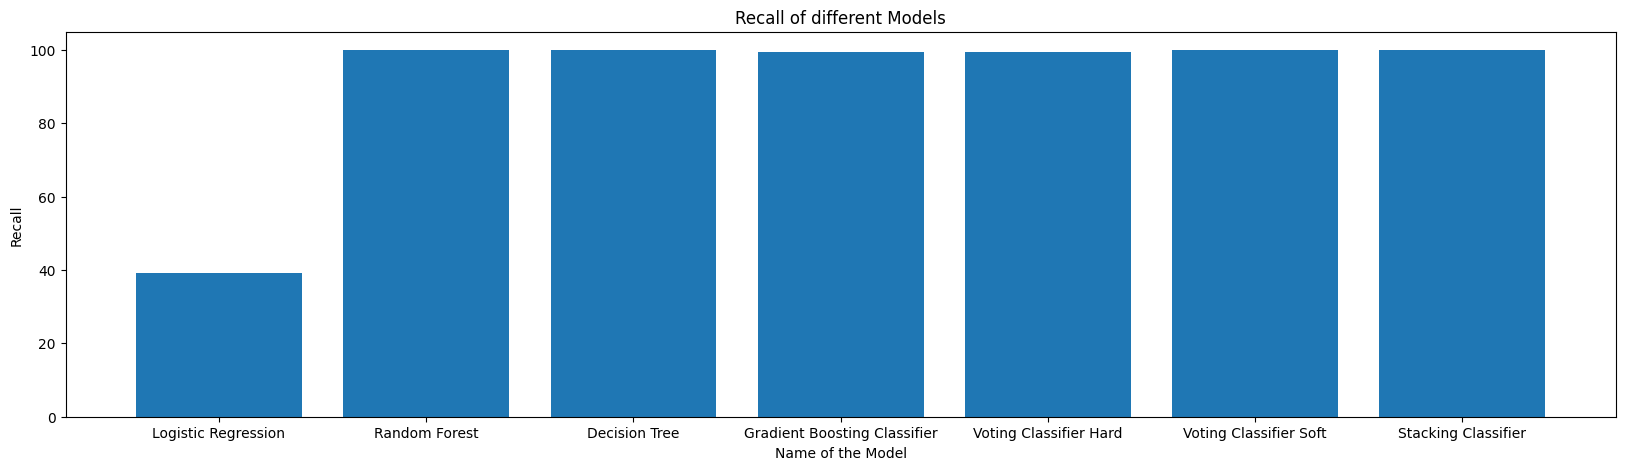

In [ ]:
plt.bar(Models, recallscorenew)
plt.xlabel('Name of the Model')
plt.ylabel('Recall')
plt.title("Recall of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

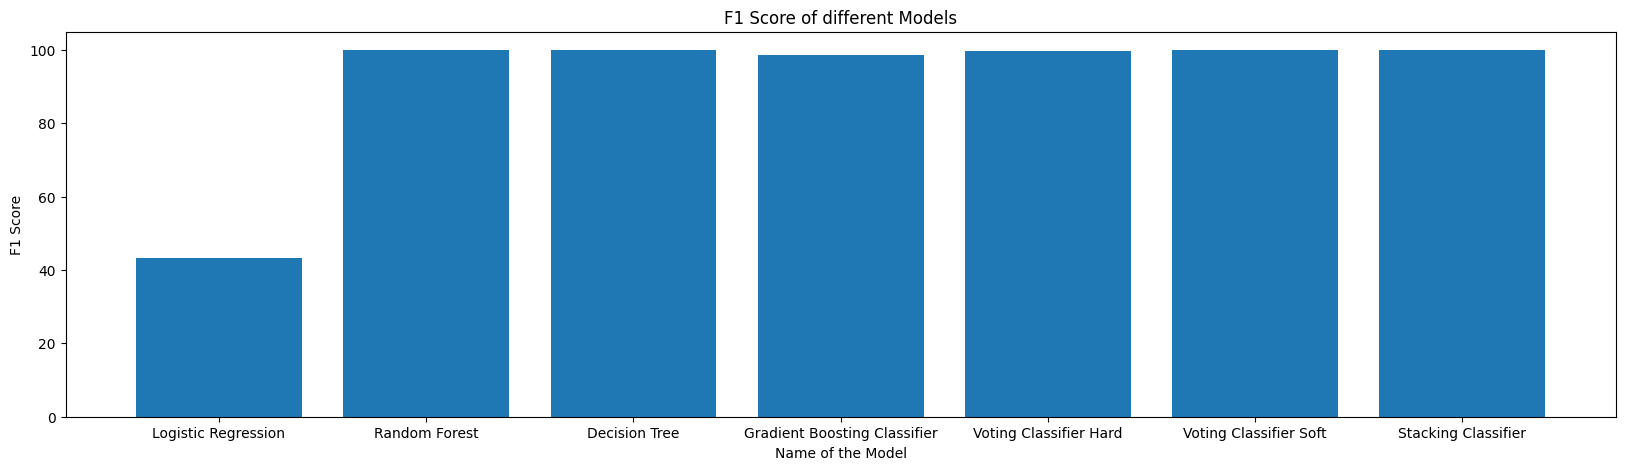

In [ ]:
plt.bar(Models, f1scorenew)
plt.xlabel('Name of the Model')
plt.ylabel('F1 Score')
plt.title("F1 Score of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

In [ ]:
data_table11 = [["Logistic Regression", lr11_train, lr11_test], 
        ["Random Forest", rf11_train, rf11_test],
        ["Decision Tree", dt11_train, dt11_test],
        ["Gradient Boosting Classifier", gbc11_train, gbc11_test],
        ["Voting Classifier Hard", vch11_train, vch11_test],
        ["Voting Classifier Soft", vcs11_train, vcs11_test],
        ["Stacking Classifier", sc11_train, sc11_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data_table11, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════════╤═══════════════╤══════════════╕
│ Model                        │   Train Score │   Test Score │
╞══════════════════════════════╪═══════════════╪══════════════╡
│ Logistic Regression          │      0.715479 │     0.714882 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Random Forest                │      1        │     0.999936 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Decision Tree                │      1        │     0.999936 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Gradient Boosting Classifier │      0.995997 │     0.995474 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Voting Classifier Hard       │      0.998335 │     0.998299 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Voting Classifier Soft       │      0.999917 │     0.999679 │
├──────────────────────────────┼───────────────┼──────────────┤
│ Stacking Classifier          │      1 

In [ ]:
result_table11 = [["Logistic Regression", plr11, rlr11, f1lr11], 
        ["Random Forest", prf11, rrf11, f1rf11],
        ["Decision Tree", pdt11, rdt11, f1dt11],
        ["Gradient Boosting Classifier", pgbc11, rgbc11, f1gbc11],
        ["Voting Classifier Hard", pvch11, rvch11, f1vch11],
        ["Voting Classifier Soft", pvcs11, rvcs11, f1vcs11],
        ["Stacking Classifier", psc11, rsc11, f1sc11]]

col_names = ["Model", "Precision", "Recall", "F1 Score"]
print(tabulate(result_table11, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════════╤═════════════╤══════════╤════════════╕
│ Model                        │   Precision │   Recall │   F1 Score │
╞══════════════════════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression          │       65.34 │    54.82 │      59.62 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Random Forest                │       99.99 │    99.99 │      99.99 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree                │       99.99 │    99.99 │      99.99 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting Classifier │       99.27 │    99.56 │      99.41 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Voting Classifier Hard       │      100    │    99.56 │      99.78 │
├──────────────────────────────┼─────────────┼──────────┼────────────┤
│ Voting Classifier Soft       │       99.95 │    99.97 │      99.96 │
├─────

In [ ]:
accuracyscorenew1

[71.49, 99.99, 99.99, 99.55, 99.83, 99.97, 100.0]

In [ ]:
precisionscorenew1

[65.34, 99.99, 99.99, 99.27, 100.0, 99.95, 100.0]

In [ ]:
recallscorenew1

[54.82, 99.99, 99.99, 99.56, 99.56, 99.97, 99.99]

In [ ]:
f1scorenew1

[59.62, 99.99, 99.99, 99.41, 99.78, 99.96, 100.0]

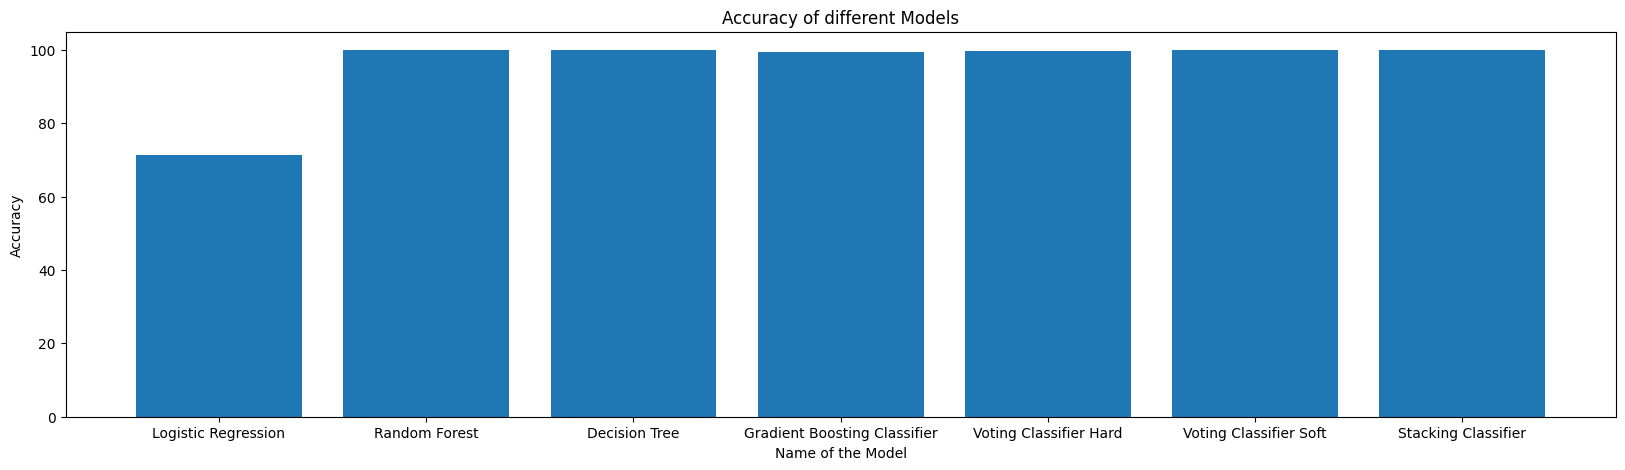

In [ ]:
plt.bar(Models, accuracyscorenew1)
plt.xlabel('Name of the Model')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

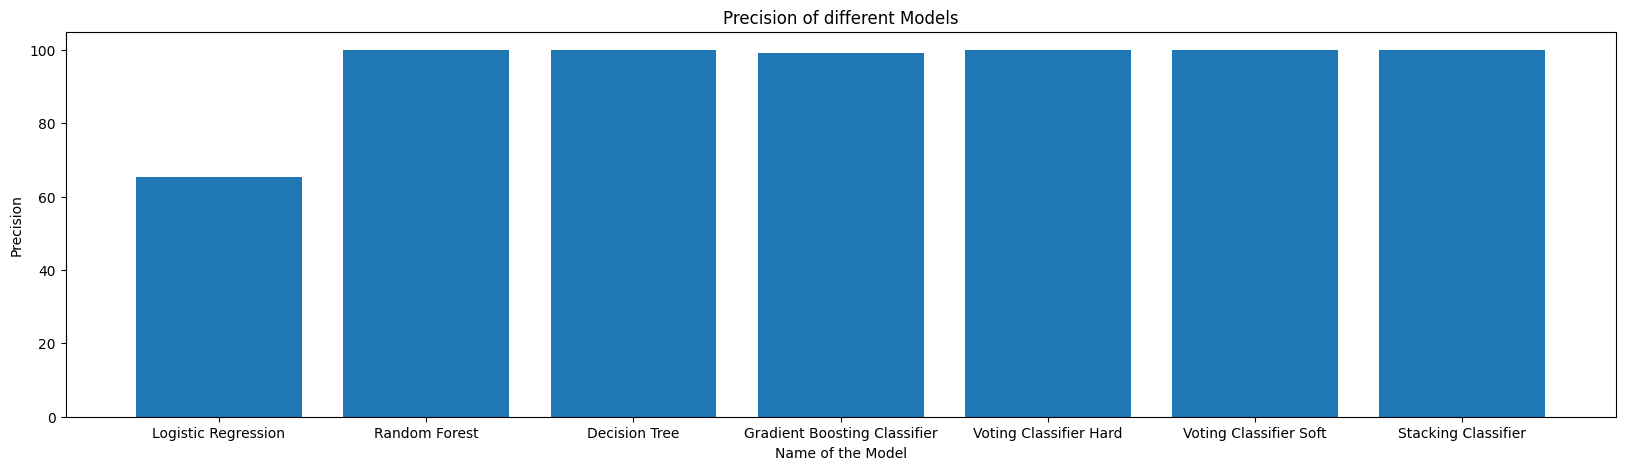

In [ ]:
plt.bar(Models, precisionscorenew1)
plt.xlabel('Name of the Model')
plt.ylabel('Precision')
plt.title("Precision of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

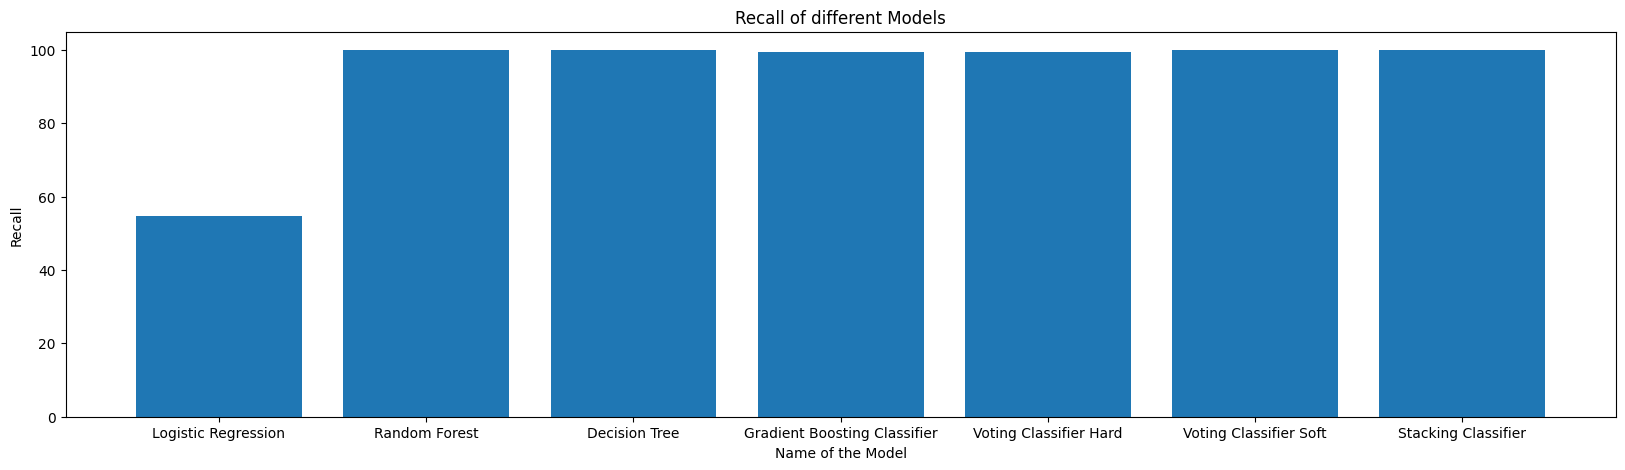

In [ ]:
plt.bar(Models, recallscorenew1)
plt.xlabel('Name of the Model')
plt.ylabel('Recall')
plt.title("Recall of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

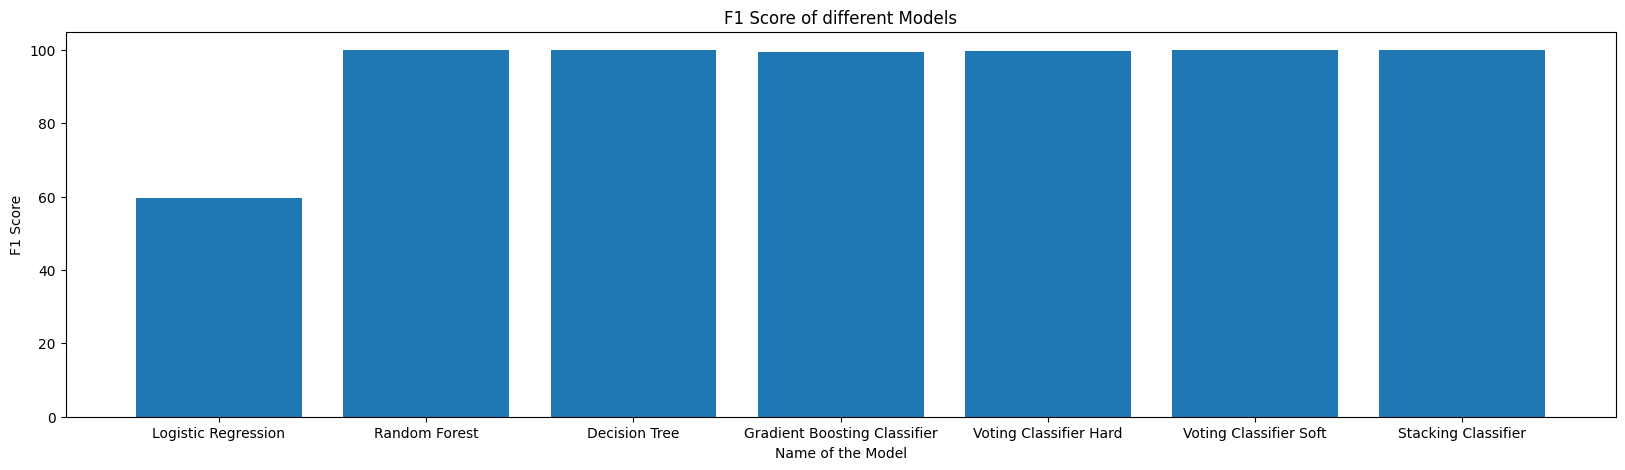

In [ ]:
plt.bar(Models, f1scorenew1)
plt.xlabel('Name of the Model')
plt.ylabel('F1 Score')
plt.title("F1 Score of different Models")
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()